# Australian Freight Export Data Analysis
### Comprehensive Analysis of 2024-2025 Export Data

## 1. Setup & Data Loading


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print('✅ Libraries loaded successfully!')

✅ Libraries loaded successfully!


In [2]:
# Load the cleaned dataset
df = pd.read_csv('data/exports_cleaned.csv')

print(f" Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
df.head(3)


 Dataset loaded successfully!
Shape: (1479965, 21)

Columns: ['month', 'prod_descpt_code', 'product_description', 'country_of_destination_code', 'country_of_destination', 'port_of_discharge_code', 'port_of_discharge', 'state_of_origin_code', 'state_of_origin', 'port_of_loading_code', 'port_of_loading', 'mode_of_transport_code', 'mode_of_transport', 'unit_of_quantity', 'quantity', 'gross_weight_tonnes', 'value_fob_aud', 'year', 'month_number', 'value_per_tonne', 'data_processed_date']


,month,prod_descpt_code,product_description,country_of_destination_code,country_of_destination,port_of_discharge_code,port_of_discharge,state_of_origin_code,state_of_origin,port_of_loading_code,port_of_loading,mode_of_transport_code,mode_of_transport,unit_of_quantity,quantity,gross_weight_tonnes,value_fob_aud,year,month_number,value_per_tonne,data_processed_date
0,January,76421,Microphones and stands therefor,NZ,New Zealand,554100,Auckland,1,New South Wales,101,Sydney,S,SEA,Number,1598.0,1.17700,128687.0,2024,1,109334.749363,2025-10-28
1,January,76421,Microphones and stands therefor,NZ,New Zealand,554100,Auckland,2,Victoria,201,Melbourne,A,AIR,Number,25.0,0.12808,25013.0,2024,1,195292.004997,2025-10-28
2,January,76421,Microphones and stands therefor,NZ,New Zealand,554100,Auckland,F,Re-exports,201,Melbourne,S,SEA,Number,8.0,0.04920,492.0,2024,1,10000.000000,2025-10-28


In [3]:
# Basic statistics
print("=== DATASET SUMMARY ===")
print(f"Total Records: {len(df):,}")
print(f"\nUnique Values:")
print(f"  Countries: {df['country_of_destination'].nunique()}")
print(f"  Products: {df['product_description'].nunique()}")
print(f"  States: {df['state_of_origin'].nunique()}")
print(f"  Transport Modes: {df['mode_of_transport'].nunique()}")

print(f"\n=== FINANCIAL SUMMARY ===")
print(f"Total Export Value: AUD ${df['value_fob_aud'].sum():,.2f}")
print(f"Average Shipment Value: AUD ${df['value_fob_aud'].mean():,.2f}")
print(f"Median Shipment Value: AUD ${df['value_fob_aud'].median():,.2f}")

print(f"\n=== WEIGHT SUMMARY ===")
print(f"Total Weight: {df['gross_weight_tonnes'].sum():,.2f} tonnes")
print(f"Average Value per Tonne: AUD ${df['value_per_tonne'].mean():,.2f}")


=== DATASET SUMMARY ===
Total Records: 1,479,965

Unique Values:
  Countries: 219


  Products: 2341
  States: 10
  Transport Modes: 4

=== FINANCIAL SUMMARY ===
Total Export Value: AUD $1,031,293,072,667.00
Average Shipment Value: AUD $696,836.12
Median Shipment Value: AUD $7,168.00

=== WEIGHT SUMMARY ===
Total Weight: 2,780,691,054.60 tonnes
Average Value per Tonne: AUD $1,898,383.66


## 2. Time Series Analysis


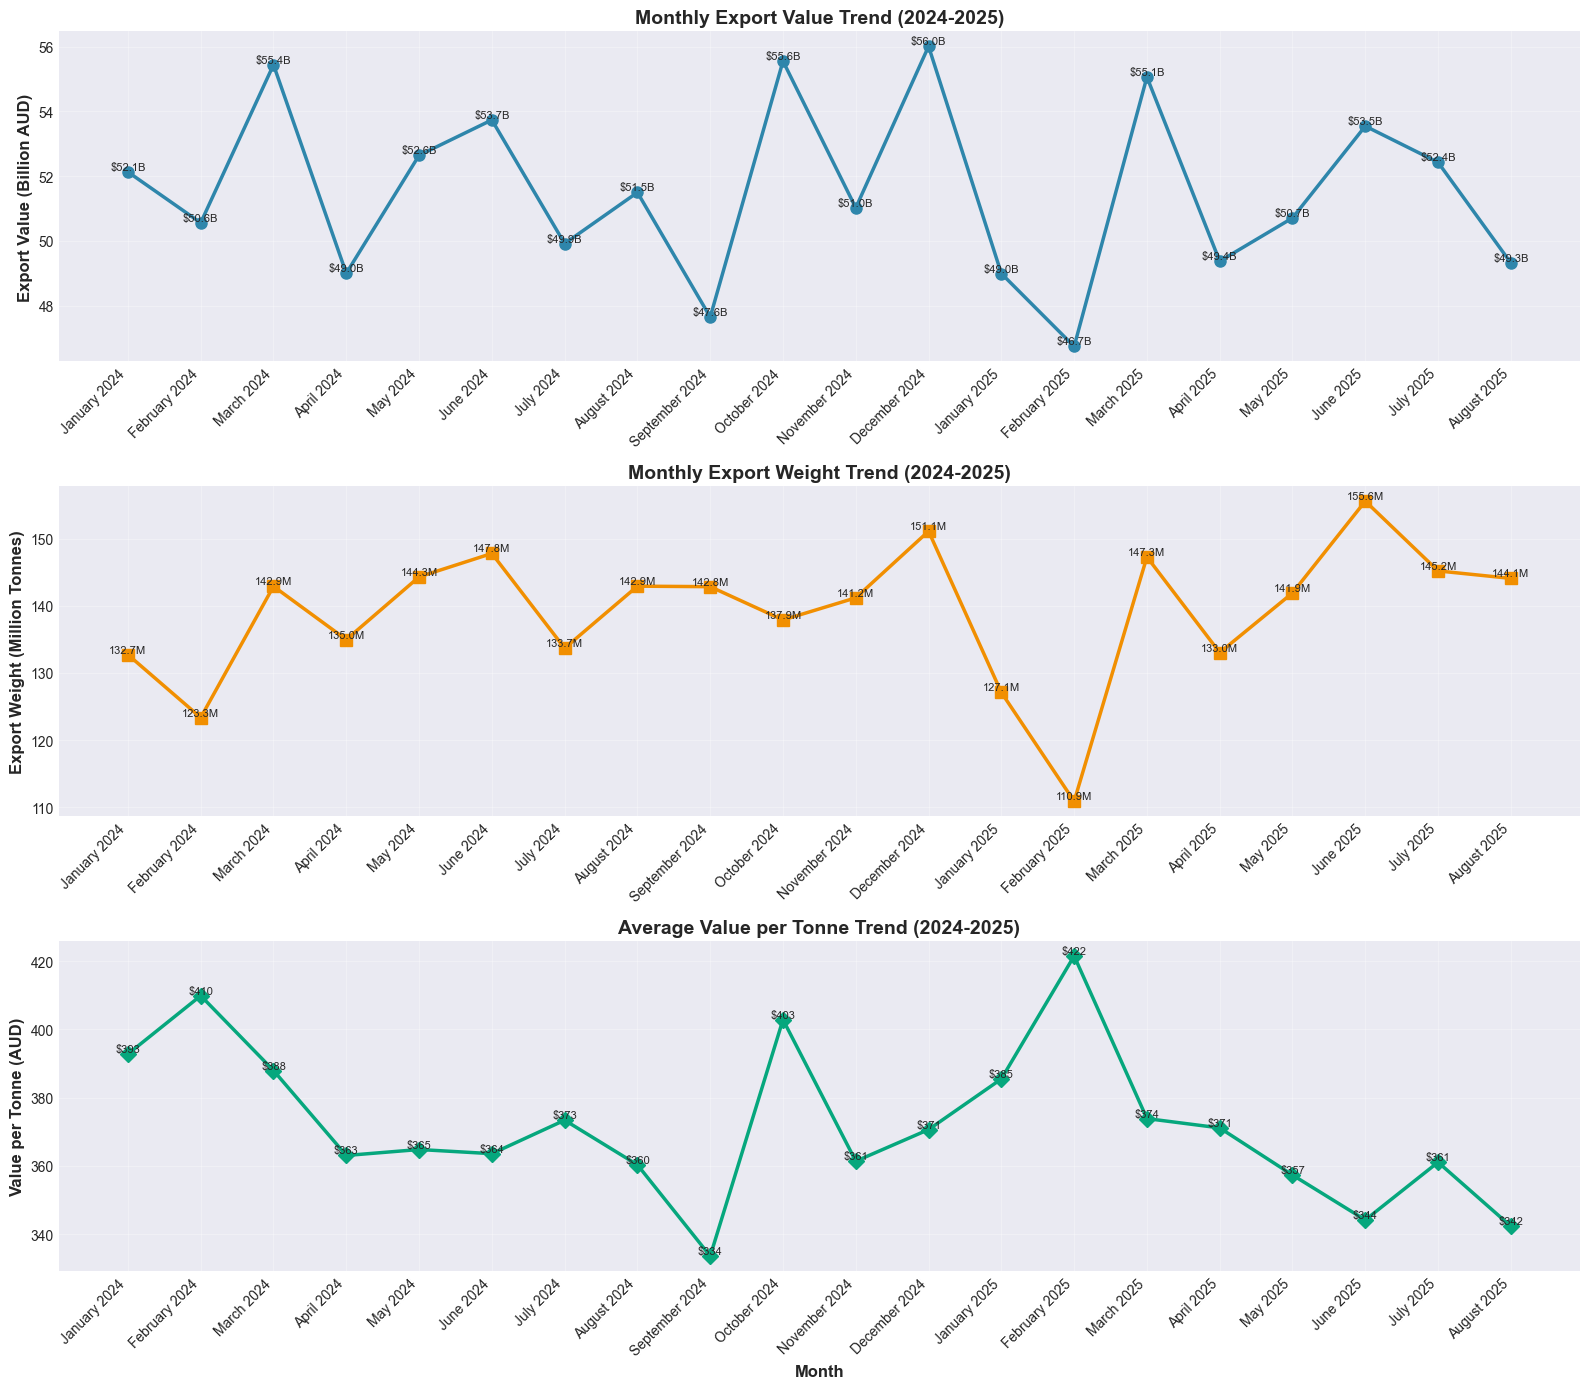


=== MONTHLY EXPORT SUMMARY ===
        period  value_billions  weight_millions  value_per_tonne
  January 2024       52.129095       132.714447       392.791414
 February 2024       50.557972       123.339821       409.907940
    March 2024       55.439948       142.898042       387.968565
    April 2024       48.996955       134.960064       363.047808
      May 2024       52.642242       144.305952       364.796054
     June 2024       53.735443       147.797192       363.575537
     July 2024       49.915133       133.679229       373.394830
   August 2024       51.495813       142.922506       360.305838
September 2024       47.644836       142.848450       333.534148
  October 2024       55.552203       137.890423       402.872093
 November 2024       51.020098       141.186046       361.367848
 December 2024       56.009629       151.114078       370.644678
  January 2025       48.990600       127.085578       385.492992
 February 2025       46.736746       110.866573       421.

In [4]:
# Monthly export trends
monthly = df.groupby(['year', 'month_number', 'month']).agg({
    'value_fob_aud': 'sum',
    'gross_weight_tonnes': 'sum'
}).reset_index().sort_values(['year', 'month_number'])

monthly['period'] = monthly['month'] + ' ' + monthly['year'].astype(str)

# Calculate value per tonne
monthly['value_per_tonne'] = monthly['value_fob_aud'] / monthly['gross_weight_tonnes']

# Create three separate, clear visualizations
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 14))

# Graph 1: Export Value Over Time
ax1.plot(range(len(monthly)), monthly['value_fob_aud'] / 1e9, 
         marker='o', linewidth=2.5, markersize=8, color='#2E86AB')
ax1.set_ylabel('Export Value (Billion AUD)', fontsize=12, fontweight='bold')
ax1.set_title('Monthly Export Value Trend (2024-2025)', fontsize=14, fontweight='bold')
ax1.set_xticks(range(len(monthly)))
ax1.set_xticklabels(monthly['period'], rotation=45, ha='right')
ax1.grid(True, alpha=0.3)
# Add value labels on points
for i, val in enumerate(monthly['value_fob_aud'] / 1e9):
    ax1.text(i, val, f'${val:.1f}B', ha='center', va='bottom', fontsize=8)

# Graph 2: Export Weight Over Time
ax2.plot(range(len(monthly)), monthly['gross_weight_tonnes'] / 1e6, 
         marker='s', linewidth=2.5, markersize=8, color='#F18F01')
ax2.set_ylabel('Export Weight (Million Tonnes)', fontsize=12, fontweight='bold')
ax2.set_title('Monthly Export Weight Trend (2024-2025)', fontsize=14, fontweight='bold')
ax2.set_xticks(range(len(monthly)))
ax2.set_xticklabels(monthly['period'], rotation=45, ha='right')
ax2.grid(True, alpha=0.3)
# Add value labels on points
for i, val in enumerate(monthly['gross_weight_tonnes'] / 1e6):
    ax2.text(i, val, f'{val:.1f}M', ha='center', va='bottom', fontsize=8)

# Graph 3: Value per Tonne Over Time (KEY METRIC FOR LOGISTICS!)
ax3.plot(range(len(monthly)), monthly['value_per_tonne'], 
         marker='D', linewidth=2.5, markersize=8, color='#06A77D')
ax3.set_xlabel('Month', fontsize=12, fontweight='bold')
ax3.set_ylabel('Value per Tonne (AUD)', fontsize=12, fontweight='bold')
ax3.set_title('Average Value per Tonne Trend (2024-2025)', fontsize=14, fontweight='bold')
ax3.set_xticks(range(len(monthly)))
ax3.set_xticklabels(monthly['period'], rotation=45, ha='right')
ax3.grid(True, alpha=0.3)
# Add value labels on points
for i, val in enumerate(monthly['value_per_tonne']):
    ax3.text(i, val, f'${val:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Print summary table
print("\n=== MONTHLY EXPORT SUMMARY ===")
summary_df = monthly[['period', 'value_fob_aud', 'gross_weight_tonnes', 'value_per_tonne']].copy()
summary_df['value_billions'] = summary_df['value_fob_aud'] / 1e9
summary_df['weight_millions'] = summary_df['gross_weight_tonnes'] / 1e6
print(summary_df[['period', 'value_billions', 'weight_millions', 'value_per_tonne']].to_string(index=False))


## 3. Country Analysis


=== TOP 15 EXPORT DESTINATIONS ===
                                                    value_billions        pct
country_of_destination                                                       
China                                                   293.729695  28.481690
No Country Details                                      133.719155  12.966164
Japan                                                   112.576112  10.916016
United States of America                                 64.170964   6.222379
Korea, Republic of (South)                               63.773964   6.183884
Singapore                                                42.189197   4.090903
India                                                    38.204712   3.704545
Taiwan                                                   29.500704   2.860555
United Kingdom, Channel Islands and Isle of Man...       24.154443   2.342151
Indonesia                                                23.627993   2.291104
New Zealand                  

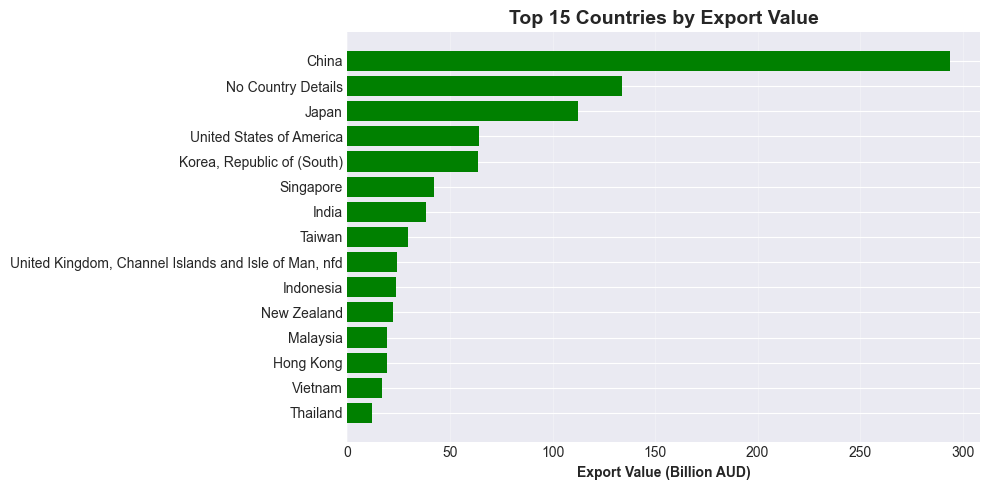

In [5]:
# Top export destinations
top_countries = df.groupby('country_of_destination').agg({
    'value_fob_aud': 'sum',
    'gross_weight_tonnes': 'sum'
}).sort_values('value_fob_aud', ascending=False)

top_countries['value_billions'] = top_countries['value_fob_aud'] / 1e9
top_countries['pct'] = (top_countries['value_fob_aud'] / top_countries['value_fob_aud'].sum() * 100)

print("=== TOP 15 EXPORT DESTINATIONS ===")
print(top_countries[['value_billions', 'pct']].head(15))

# Visualize
fig, ax = plt.subplots(figsize=(10, 5))
top_15 = top_countries.head(15)
ax.barh(range(len(top_15)), top_15['value_billions'], color='green')
ax.set_yticks(range(len(top_15)))
ax.set_yticklabels(top_15.index)
ax.set_xlabel('Export Value (Billion AUD)', fontweight='bold')
ax.set_title('Top 15 Countries by Export Value', fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


#### 4. Product Analysis


In [6]:

# Top 20 products by value
top_products = df.groupby('product_description').agg({
    'value_fob_aud': 'sum',
    'gross_weight_tonnes': 'sum'
}).sort_values('value_fob_aud', ascending=False)

# Create clean display columns (rounded to 2 decimal places)
top_products['Value ($B)'] = (top_products['value_fob_aud'] / 1e9).round(2)
top_products['Weight (M Tonnes)'] = (top_products['gross_weight_tonnes'] / 1e6).round(2)
top_products['% Total'] = ((top_products['value_fob_aud'] / top_products['value_fob_aud'].sum() * 100)).round(2)

# Get top 20 with FULL product names (no truncation)
top_20_display = top_products.head(20).copy()
top_20_display['Product'] = top_20_display.index  # Full product name

# Reset index and add rank
top_20_display = top_20_display.reset_index(drop=True)
top_20_display.index = range(1, 21)
top_20_display.index.name = 'Rank'

# Create final display DataFrame
products_df = top_20_display[['Product', 'Value ($B)', 'Weight (M Tonnes)', '% Total']].copy()

# Display summary
print(f" TOP 20 PRODUCTS BY EXPORT VALUE")
print(f"Total Export Value: AUD ${top_products['value_fob_aud'].sum()/1e9:.2f} Billion")
print(f"Top 20 represent: {products_df['% Total'].sum():.2f}% of total exports\n")

# Format display options for readability
pd.set_option('display.max_colwidth', None)  # Show full text in columns
pd.set_option('display.float_format', '{:,.2f}'.format)  # Comma separator + 2 decimals

products_df

 TOP 20 PRODUCTS BY EXPORT VALUE
Total Export Value: AUD $1031.29 Billion
Top 20 represent: 82.59% of total exports



,Product,Value ($B),Weight (M Tonnes),% Total
Rank,,,,
1,"Iron ore and concentrates, not agglomerated",201.60,"1,566.95",19.55
2,Special transactions and commodities not classified according to kind,138.85,196.46,13.46
3,"Bituminous coal, whether or not pulverized, not agglomerated",126.53,589.69,12.27
4,"Natural gas, liquefied",108.84,133.38,10.55
5,Non-monetary gold (incl. gold plated with platinum) unwrought or in semi-manufactured or powder form,73.46,0.00,7.12
6,Commodities and transactions not classified elsewhere in the SITC,44.92,1.82,4.36
7,Metalliferous ores and metal scrap,29.54,33.22,2.86
8,"Petroleum oils and oils obtained from bituminous minerals, crude",17.16,18.46,1.66
9,Wheat (incl. spelt) and meslin (excl. durum wheat) unmilled,15.44,37.15,1.50


#### 5. State & Transport Analysis


In [7]:
# State Analysis Data Preparation
print("=== STATE ANALYSIS ===")

# Calculate state-level export values
states = df.groupby('state_of_origin')['value_fob_aud'].sum().sort_values(ascending=False)
states_pct = (states / states.sum() * 100).round(1)

print(f"Total states: {len(states)}")
print(f"Top 5 states by export value:")
for i, (state, value) in enumerate(states.head().items(), 1):
    print(f"  {i}. {state}: ${value/1e9:.2f}B ({states_pct[state]:.1f}%)")

print("✅ State data prepared for visualization")

=== STATE ANALYSIS ===
Total states: 10
Top 5 states by export value:
  1. Western Australia: $391.24B (37.9%)
  2. Queensland: $177.80B (17.2%)
  3. New South Wales: $138.46B (13.4%)
  4. No state details: $137.86B (13.4%)
  5. Re-exports: $66.76B (6.5%)
✅ State data prepared for visualization


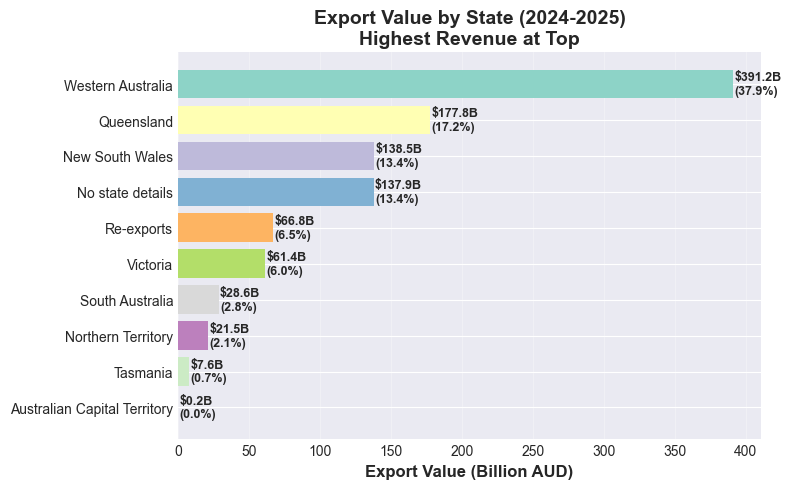


=== STATE RANKING (Highest to Lowest Revenue) ===
1. Western Australia: $391.24B (37.9%)
2. Queensland: $177.80B (17.2%)
3. New South Wales: $138.46B (13.4%)
4. No state details: $137.86B (13.4%)
5. Re-exports: $66.76B (6.5%)
6. Victoria: $61.36B (6.0%)
7. South Australia: $28.58B (2.8%)
8. Northern Territory: $21.46B (2.1%)
9. Tasmania: $7.58B (0.7%)
10. Australian Capital Territory: $0.19B (0.0%)


In [8]:
# State Analysis Visualization (Highest Revenue at Top)
plt.figure(figsize=(8, 5))

# Ensure states are sorted by value (highest to lowest)
states_sorted = states.sort_values(ascending=False)
states_pct_sorted = states_pct.reindex(states_sorted.index)

# Create colors for each state
colors = plt.cm.Set3(np.linspace(0, 1, len(states_sorted)))

# Create horizontal bar chart (highest value will be at top)
bars = plt.barh(range(len(states_sorted)), states_sorted.values / 1e9, color=colors)

# Set y-axis labels (state names) - highest revenue at top (index 0)
plt.yticks(range(len(states_sorted)), states_sorted.index, fontsize=10)
plt.xlabel('Export Value (Billion AUD)', fontsize=12, fontweight='bold')
plt.title('Export Value by State (2024-2025)\nHighest Revenue at Top', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, states_sorted.values)):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, 
             f'${value/1e9:.1f}B\n({states_pct_sorted.iloc[i]:.1f}%)',
             ha='left', va='center', fontsize=9, fontweight='bold')

# Reverse y-axis so highest value appears at the top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# Print ranking for confirmation
print("\n=== STATE RANKING (Highest to Lowest Revenue) ===")
for i, (state, value) in enumerate(states_sorted.items(), 1):
    print(f"{i}. {state}: ${value/1e9:.2f}B ({states_pct_sorted[state]:.1f}%)")

In [9]:
# Transport mode analysis  
transport = df.groupby('mode_of_transport')['value_fob_aud'].sum().sort_values(ascending=False)
transport_pct = (transport / transport.sum() * 100)

print("\n=== EXPORTS BY TRANSPORT MODE ===")
for mode, value in transport.items():
    print(f"{mode}: ${value/1e9:.2f}B ({transport_pct[mode]:.1f}%)")



=== EXPORTS BY TRANSPORT MODE ===
SEA: $862.92B (83.7%)
AIR: $157.94B (15.3%)
MODE OF TRANSPORT NOT AVAILABLE FOR PUBLICATION: $10.40B (1.0%)
POST: $0.04B (0.0%)


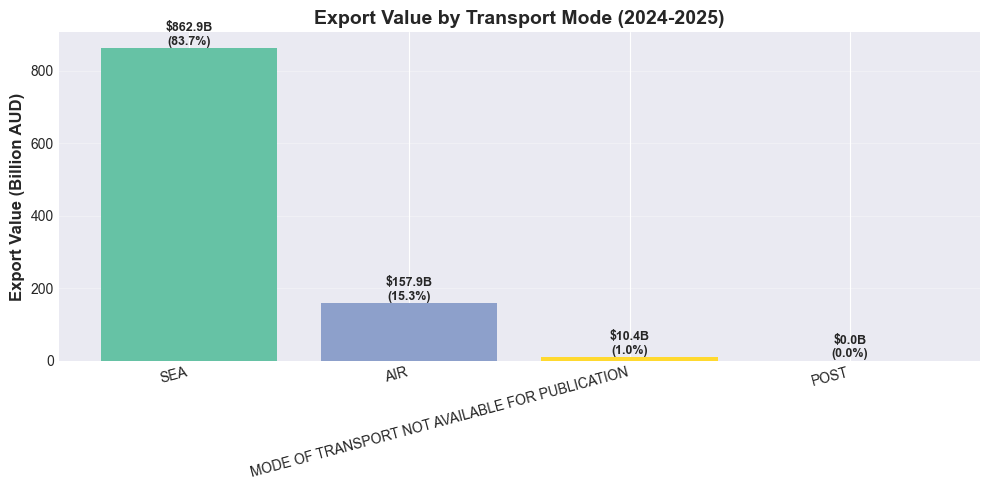

In [10]:
# Transport Mode Visualization (Vertical Bar Chart)
plt.figure(figsize=(10, 5))
colors = plt.cm.Set2(np.linspace(0, 1, len(transport)))
bars = plt.bar(range(len(transport)), transport.values / 1e9, color=colors)

plt.xticks(range(len(transport)), transport.index, fontsize=10, rotation=15, ha='right')
plt.ylabel('Export Value (Billion AUD)', fontsize=12, fontweight='bold')
plt.title('Export Value by Transport Mode (2024-2025)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, transport.values)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, 
             f'${value/1e9:.1f}B\n({transport_pct.iloc[i]:.1f}%)',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Custom Analysis
*Add your own specific analyses here*


In [11]:
# Your custom analysis code here
# Examples:
# - Analyze specific countries or regions
# - Product category deep-dive
# - Seasonal patterns
# - Port efficiency analysis
# - Value per tonne trends



## 7. Executive Summary


In [12]:
# Generate executive summary report
print("="*70)
print("EXECUTIVE SUMMARY - AUSTRALIAN FREIGHT EXPORTS 2024-2025")
print("="*70)

print(f"\n OVERVIEW")
print(f"  Total Export Value: AUD ${df['value_fob_aud'].sum()/1e9:.2f} Billion")
print(f"  Total Weight: {df['gross_weight_tonnes'].sum()/1e6:.2f} Million Tonnes")
print(f"  Total Shipments: {len(df):,}")
print(f"  Average Shipment Value: AUD ${df['value_fob_aud'].mean():,.2f}")

print(f"\n TOP 3 DESTINATIONS")
for i, (country, value) in enumerate(top_countries['value_fob_aud'].head(3).items(), 1):
    pct = (value / top_countries['value_fob_aud'].sum() * 100)
    print(f"  {i}. {country}: AUD ${value/1e9:.2f}B ({pct:.1f}%)")

print(f"\n TOP 3 PRODUCTS")
for i, (product, value) in enumerate(top_products['value_fob_aud'].head(3).items(), 1):
    prod_name = product[:50] + '...' if len(product) > 50 else product
    print(f"  {i}. {prod_name}")
    print(f"      Value: AUD ${value/1e6:.2f}M")

print(f"\n TOP 3 STATES")
for i, (state, value) in enumerate(states.head(3).items(), 1):
    pct = (value / states.sum() * 100)
    print(f"  {i}. {state}: AUD ${value/1e9:.2f}B ({pct:.1f}%)")

print("\n" + "="*70)
print(f"Report Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*70)


EXECUTIVE SUMMARY - AUSTRALIAN FREIGHT EXPORTS 2024-2025

 OVERVIEW
  Total Export Value: AUD $1031.29 Billion
  Total Weight: 2780.69 Million Tonnes
  Total Shipments: 1,479,965
  Average Shipment Value: AUD $696,836.12

 TOP 3 DESTINATIONS
  1. China: AUD $293.73B (28.5%)
  2. No Country Details: AUD $133.72B (13.0%)
  3. Japan: AUD $112.58B (10.9%)

 TOP 3 PRODUCTS
  1. Iron ore and concentrates, not agglomerated
      Value: AUD $201596.66M
  2. Special transactions and commodities not classifie...
      Value: AUD $138851.76M
  3. Bituminous coal, whether or not pulverized, not ag...
      Value: AUD $126532.40M

 TOP 3 STATES
  1. Western Australia: AUD $391.24B (37.9%)
  2. Queensland: AUD $177.80B (17.2%)
  3. New South Wales: AUD $138.46B (13.4%)

Report Generated: 2025-10-28 12:47:37


#### product categories


In [13]:
# SITC Code-Based Product Categorization
print("=== SITC CODE-BASED PRODUCT CATEGORIZATION ===")

# First, let's examine the SITC codes in detail
print(f" SITC Code Analysis:")
print(f"Unique SITC codes: {df['prod_descpt_code'].nunique():,}")
print(f"Total records: {len(df):,}")
print(f"Records with valid SITC codes: {df['prod_descpt_code'].notna().sum():,}")
print(f"Records with missing SITC codes: {df['prod_descpt_code'].isna().sum():,}")

print(f"-----------------------------------")


# Import SITC mapping and create sitc_category column
from sitc_mapping import SITC_MAPPING

def get_sitc_section(sitc_code):
    if pd.isna(sitc_code) or sitc_code == '':
        return 'Other Commodities'
    sitc_str = str(sitc_code).strip()
    if len(sitc_str) >= 2:
        section_code = sitc_str[:2]
        return SITC_MAPPING.get(section_code, 'Other Commodities')
    return 'Other Commodities'

df['sitc_category'] = df['prod_descpt_code'].apply(get_sitc_section)
print(f" SITC categories created: {df['sitc_category'].nunique()} unique categories\n")

# Create Stakeholder-Friendly Industry Categories
print("=== CREATING STAKEHOLDER-FRIENDLY INDUSTRY CATEGORIES ===")

# Map SITC sections to industry-friendly names
# Map SITC code to industry category using first digit
def get_industry_category(sitc_code):
    if pd.isna(sitc_code) or sitc_code == '':
        return 'Other Commodities'
    first_digit = str(sitc_code).strip()[0] if len(str(sitc_code).strip()) >= 1 else '9'
    mapping = {'0': 'Food & Agriculture', '1': 'Beverages & Tobacco', '2': 'Raw Materials & Mining', 
               '3': 'Energy & Petroleum', '4': 'Food Processing', '5': 'Chemicals & Pharmaceuticals',
               '6': 'Manufactured Goods and materials', '7': 'Machinery & Equipment', 
               '8': 'Consumer Goods', '9': 'Other Commodities'}
    return mapping.get(first_digit, 'Other Commodities')

df['industry_category'] = df['prod_descpt_code'].apply(get_industry_category)
print(f"Industry categories: {df['industry_category'].nunique()} categories created")

# Analyze by industry category
industry_analysis = df.groupby('industry_category').agg({
    'value_fob_aud': ['sum', 'count', 'mean'],
    'gross_weight_tonnes': 'sum'
}).round(2)

# Flatten column names
industry_analysis.columns = ['Total_Value', 'Shipment_Count', 'Avg_Value', 'Total_Weight']

# Calculate CORRECT value per tonne: Total Value ÷ Total Weight (ratio of totals)
industry_analysis['Value_per_Tonne_Ratio'] = industry_analysis['Total_Value'] / industry_analysis['Total_Weight']
industry_analysis = industry_analysis.sort_values('Total_Value', ascending=False)

# Calculate percentages
total_value = industry_analysis['Total_Value'].sum()
industry_analysis['Value_Percentage'] = (industry_analysis['Total_Value'] / total_value * 100).round(1)

print(f" Created {df['industry_category'].nunique()} industry categories")
print(f" Industry Category Distribution:")
for category, row in industry_analysis.iterrows():
    print(f"  {category}: ${row['Total_Value']/1e9:.1f}B ({row['Value_Percentage']:.1f}%) - {row['Shipment_Count']:,} shipments")

# Show top industry categories
print(f"\n=== TOP INDUSTRY CATEGORIES BY EXPORT VALUE ===")
top_industries = industry_analysis.head(10)
for i, (category, row) in enumerate(top_industries.iterrows(), 1):
    print(f"{i}. {category}")
    print(f"   Export Value: ${row['Total_Value']/1e9:.2f}B ({row['Value_Percentage']:.1f}%)")
    print(f"   Number of Shipments: {row['Shipment_Count']:,}")
    print(f"   Average Value per Shipment: ${row['Avg_Value']:,.0f}")
    print(f"   Value per Tonne: ${row['Value_per_Tonne_Ratio']:,.0f}")
    print()

print(f"\n=== EXPLANATION OF METRICS ===")
print(f" SHIPMENT COUNT:")
print(f"   - Each row in dataset = 1 individual export shipment")
print(f"   - Shipment Count = Total number of shipments in each industry")
print(f"   - Example: 100,000 shipments of 'Raw Materials & Mining' products")





=== SITC CODE-BASED PRODUCT CATEGORIZATION ===
 SITC Code Analysis:
Unique SITC codes: 2,849
Total records: 1,479,965
Records with valid SITC codes: 1,479,965
Records with missing SITC codes: 0
-----------------------------------


 SITC categories created: 59 unique categories

=== CREATING STAKEHOLDER-FRIENDLY INDUSTRY CATEGORIES ===


Industry categories: 9 categories created
 Created 9 industry categories
 Industry Category Distribution:
  Raw Materials & Mining: $302.0B (29.3%) - 57,735.0 shipments
  Energy & Petroleum: $267.1B (25.9%) - 15,171.0 shipments
  Other Commodities: $263.4B (25.5%) - 52,124.0 shipments
  Beverages & Tobacco: $45.5B (4.4%) - 86,172.0 shipments
  Manufactured Goods and materials: $36.0B (3.5%) - 248,968.0 shipments
  Machinery & Equipment: $35.5B (3.4%) - 487,216.0 shipments
  Chemicals & Pharmaceuticals: $32.5B (3.1%) - 183,633.0 shipments
  Food Processing: $28.1B (2.7%) - 23,838.0 shipments
  Consumer Goods: $21.1B (2.0%) - 325,108.0 shipments

=== TOP INDUSTRY CATEGORIES BY EXPORT VALUE ===
1. Raw Materials & Mining
   Export Value: $302.04B (29.3%)
   Number of Shipments: 57,735.0
   Average Value per Shipment: $5,231,421
   Value per Tonne: $174

2. Energy & Petroleum
   Export Value: $267.13B (25.9%)
   Number of Shipments: 15,171.0
   Average Value per Shipment: $17,607,744
   Val

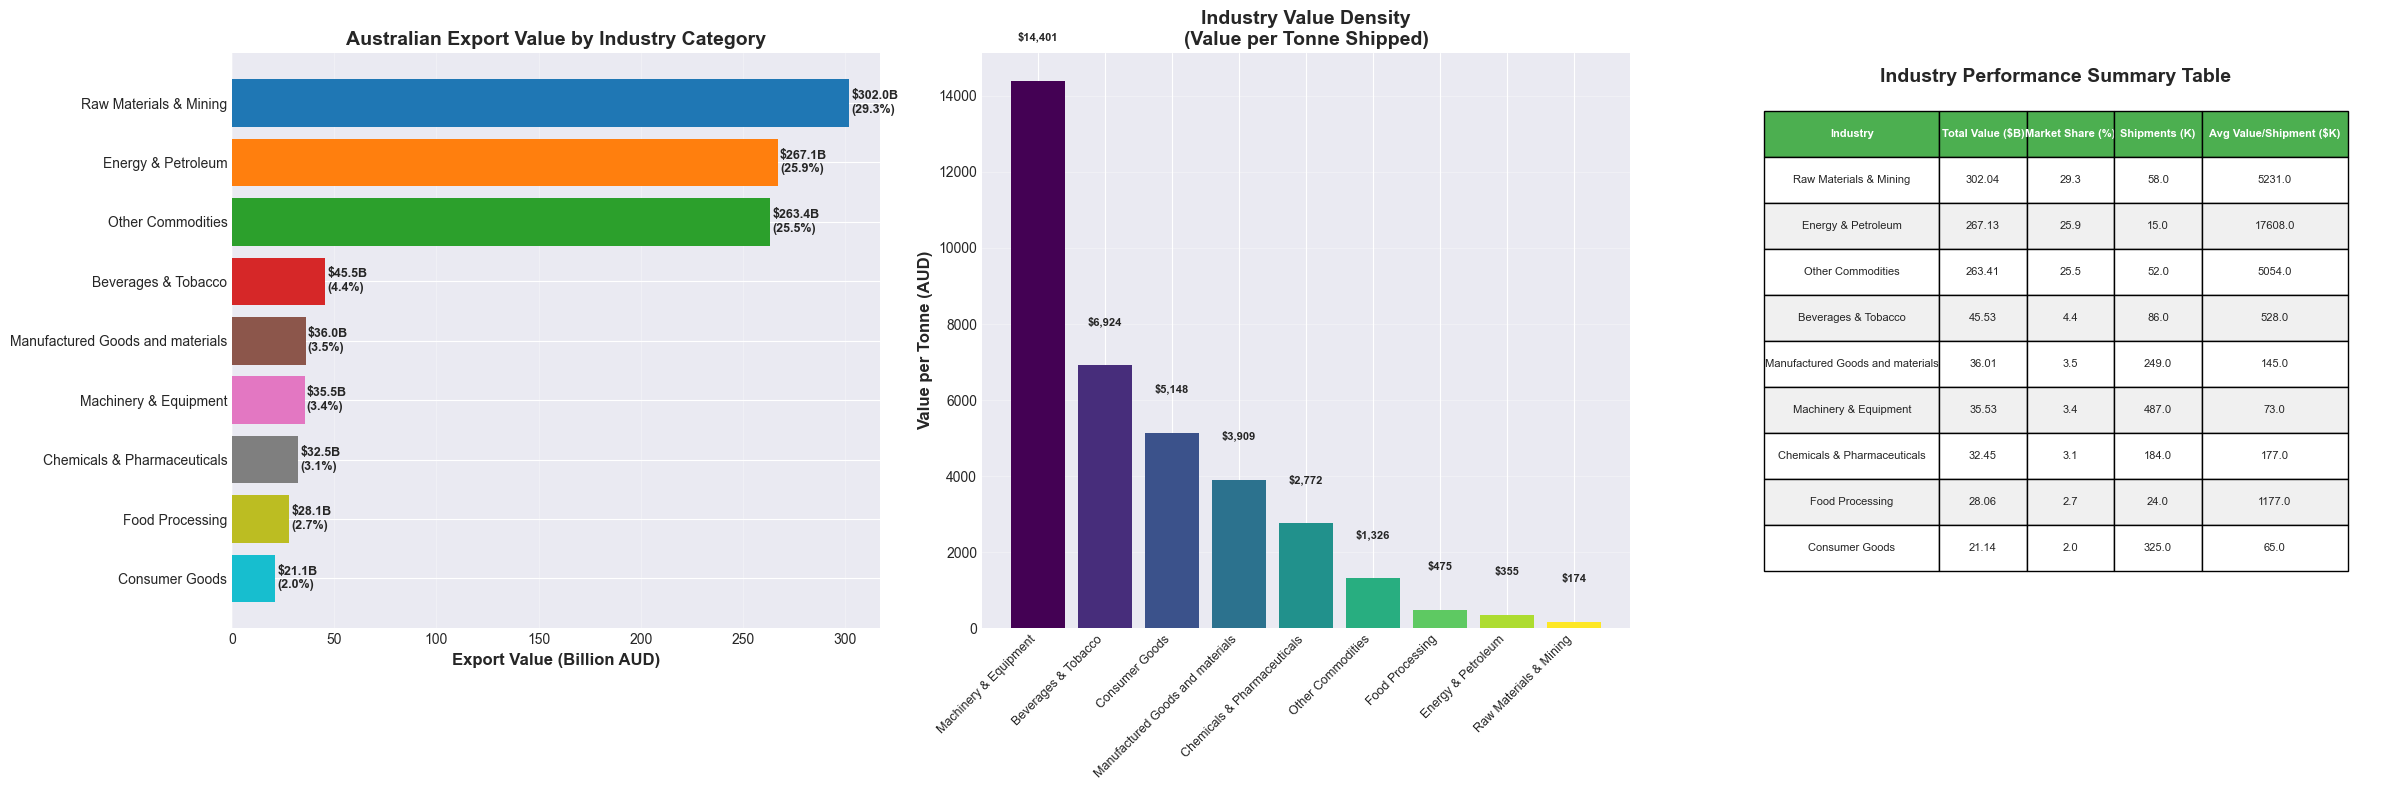


=== INDUSTRY ANALYSIS INSIGHTS ===
Top Export Industry: Raw Materials & Mining ($302.0B)
Highest Value Density: Machinery & Equipment ($14,401/tonne)
Most Active Industry: Machinery & Equipment (487,216.0 shipments)

 Industry Concentration:
 Top 3 industries: 80.7% of total exports
 Top 5 industries: 88.6% of total exports

Industry categorization provides stakeholder-friendly analysis!
Perfect for business presentations and strategic planning.


In [14]:
# Industry Category Visualization (Stakeholder-Friendly)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

# Chart 1: Industry Categories by Export Value (Horizontal Bar)
top_industries = industry_analysis.head(10)
colors1 = plt.cm.tab10(np.linspace(0, 1, len(top_industries)))
bars1 = ax1.barh(range(len(top_industries)), top_industries['Total_Value'] / 1e9, color=colors1)

ax1.set_yticks(range(len(top_industries)))
ax1.set_yticklabels(top_industries.index, fontsize=10)
ax1.set_xlabel('Export Value (Billion AUD)', fontsize=12, fontweight='bold')
ax1.set_title('Australian Export Value by Industry Category', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars1, top_industries['Total_Value'])):
    width = bar.get_width()
    ax1.text(width + 1, bar.get_y() + bar.get_height()/2, 
             f'${value/1e9:.1f}B\n({top_industries.iloc[i]["Value_Percentage"]:.1f}%)',
             ha='left', va='center', fontsize=9, fontweight='bold')
ax1.invert_yaxis()

# Chart 2: Value Density by Industry (Value per Tonne)
value_density_industry = industry_analysis.sort_values('Value_per_Tonne_Ratio', ascending=False)
colors2 = plt.cm.viridis(np.linspace(0, 1, len(value_density_industry)))
bars2 = ax2.bar(range(len(value_density_industry)), value_density_industry['Value_per_Tonne_Ratio'], color=colors2)

ax2.set_xticks(range(len(value_density_industry)))
ax2.set_xticklabels(value_density_industry.index, rotation=45, ha='right', fontsize=9)
ax2.set_ylabel('Value per Tonne (AUD)', fontsize=12, fontweight='bold')
ax2.set_title('Industry Value Density\n(Value per Tonne Shipped)', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars2, value_density_industry['Value_per_Tonne_Ratio'])):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 1000, 
             f'${value:,.0f}',
             ha='center', va='bottom', fontsize=8, fontweight='bold')

# Chart 3: Industry Performance Table
# Hide the third subplot since we'll use a table
ax3.axis('off')

# Create a comprehensive industry performance table (without Value/Tonne)
table_data = industry_analysis[['Total_Value', 'Shipment_Count', 'Avg_Value', 'Value_Percentage']].copy()

# Format the data for better readability
table_data['Total_Value_B'] = (table_data['Total_Value'] / 1e9).round(2)
table_data['Avg_Value_K'] = (table_data['Avg_Value'] / 1e3).round(0)
table_data['Shipment_Count_K'] = (table_data['Shipment_Count'] / 1e3).round(0)

# Create display table with formatted columns (removed Value/Tonne)
display_table = pd.DataFrame({
    'Industry': table_data.index,
    'Total Value ($B)': table_data['Total_Value_B'],
    'Market Share (%)': table_data['Value_Percentage'],
    'Shipments (K)': table_data['Shipment_Count_K'],
    'Avg Value/Shipment ($K)': table_data['Avg_Value_K']
})

# Create table visualization with better spacing
table = ax3.table(cellText=display_table.values,
                  colLabels=display_table.columns,
                  cellLoc='center',
                  loc='center',
                  bbox=[0.05, 0.1, 0.9, 0.8])  # Adjusted bbox for better spacing

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.3, 1.8)  # Adjusted scale to prevent overlap

# Set column widths to prevent text overlap
col_widths = [0.3, 0.15, 0.15, 0.15, 0.25]  # Proportional column widths
for i, width in enumerate(col_widths):
    for j in range(len(display_table) + 1):
        table[(j, i)].set_width(width)

# Color code the table header
for i in range(len(display_table.columns)):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Color code rows alternately
for i in range(1, len(display_table) + 1):
    for j in range(len(display_table.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')
        else:
            table[(i, j)].set_facecolor('white')

# Make the table title with better positioning
ax3.text(0.5, 0.95, 'Industry Performance Summary Table', 
         transform=ax3.transAxes, fontsize=14, fontweight='bold', ha='center')

plt.tight_layout()
plt.show()

# Industry Analysis Summary
print("\n=== INDUSTRY ANALYSIS INSIGHTS ===")
print(f"Top Export Industry: {industry_analysis.index[0]} (${industry_analysis.iloc[0]['Total_Value']/1e9:.1f}B)")
print(f"Highest Value Density: {value_density_industry.index[0]} (${value_density_industry.iloc[0]['Value_per_Tonne_Ratio']:,.0f}/tonne)")
print(f"Most Active Industry: {industry_analysis.sort_values('Shipment_Count', ascending=False).index[0]} ({industry_analysis.sort_values('Shipment_Count', ascending=False).iloc[0]['Shipment_Count']:,} shipments)")

# Market concentration
top_3_industry_share = industry_analysis.head(3)['Value_Percentage'].sum()
top_5_industry_share = industry_analysis.head(5)['Value_Percentage'].sum()
print(f"\n Industry Concentration:")
print(f" Top 3 industries: {top_3_industry_share:.1f}% of total exports")
print(f" Top 5 industries: {top_5_industry_share:.1f}% of total exports")

print(f"\nIndustry categorization provides stakeholder-friendly analysis!")
print(f"Perfect for business presentations and strategic planning.")


#### Volume Vs Value analysis

In [15]:
# Volume vs. Value Analysis by Product (Identified by Industry)
print("=== VOLUME VS. VALUE ANALYSIS BY PRODUCT (INDUSTRY-IDENTIFIED) ===")

# Calculate volume and value metrics for each product
product_analysis = df.groupby('product_description').agg({
    'value_fob_aud': 'sum',
    'gross_weight_tonnes': 'sum',
    'value_per_tonne': 'mean',
    'industry_category': 'first'  # Get the industry category for each product
}).round(2)

# Calculate additional metrics
product_analysis['shipment_count'] = df.groupby('product_description').size()
product_analysis['avg_shipment_value'] = (product_analysis['value_fob_aud'] / product_analysis['shipment_count']).round(2)
product_analysis['avg_shipment_weight'] = (product_analysis['gross_weight_tonnes'] / product_analysis['shipment_count']).round(2)

# Sort by total value
product_analysis = product_analysis.sort_values('value_fob_aud', ascending=False)

# Create volume and value percentiles for classification
product_analysis['volume_percentile'] = product_analysis['gross_weight_tonnes'].rank(pct=True) * 100
product_analysis['value_percentile'] = product_analysis['value_fob_aud'].rank(pct=True) * 100
product_analysis['shipment_count_percentile'] = product_analysis['shipment_count'].rank(pct=True) * 100

# Classify products based on volume vs value (removed medium category)
def classify_product(row):
    volume_pct = row['volume_percentile']
    value_pct = row['value_percentile']
    
    if volume_pct >= 70 and value_pct >= 70:
        return 'High Volume - High Value'
    elif volume_pct >= 70 and value_pct <= 30:
        return 'High Volume - Low Value'
    elif volume_pct <= 30 and value_pct >= 70:
        return 'Low Volume - High Value'
    else:  # volume_pct <= 30 and value_pct <= 30
        return 'Low Volume - Low Value'

product_analysis['volume_value_category'] = product_analysis.apply(classify_product, axis=1)

# Focus on interesting categories
high_volume_low_value = product_analysis[product_analysis['volume_value_category'] == 'High Volume - Low Value'].head(10)
low_volume_high_value = product_analysis[product_analysis['volume_value_category'] == 'Low Volume - High Value'].head(10)
high_volume_high_value = product_analysis[product_analysis['volume_value_category'] == 'High Volume - High Value'].head(10)
low_volume_low_value = product_analysis[product_analysis['volume_value_category'] == 'Low Volume - Low Value'].head(10)

print(f"Product Classification Summary:")
category_counts = product_analysis['volume_value_category'].value_counts()
for category, count in category_counts.items():
    print(f"   {category}: {count} products")

print(f"\nHIGH VOLUME - LOW VALUE PRODUCTS (Market Opportunities):")
print(f"These products have high shipment volume but low total value - potential for value optimization")
for i, (product, row) in enumerate(high_volume_low_value.iterrows(), 1):
    print(f"{i}. {product[:60]}...")
    print(f"   Industry: {row['industry_category']}")
    print(f"   Volume: {row['gross_weight_tonnes']:,.0f} tonnes (Top {100-row['volume_percentile']:.0f}%)")
    print(f"   Value: ${row['value_fob_aud']/1e6:.1f}M (Bottom {row['value_percentile']:.0f}%)")
    print(f"   Value per Tonne: ${row['value_per_tonne']:,.0f}")
    print(f"   Shipments: {row['shipment_count']:,}")
    print()

print(f"\nLOW VOLUME - HIGH VALUE PRODUCTS (Premium Products):")
print(f"These products have low volume but high value - high-value, niche products")
for i, (product, row) in enumerate(low_volume_high_value.iterrows(), 1):
    print(f"{i}. {product[:60]}...")
    print(f"   Industry: {row['industry_category']}")
    print(f"   Volume: {row['gross_weight_tonnes']:,.0f} tonnes (Bottom {row['volume_percentile']:.0f}%)")
    print(f"   Value: ${row['value_fob_aud']/1e6:.1f}M (Top {100-row['value_percentile']:.0f}%)")
    print(f"   Value per Tonne: ${row['value_per_tonne']:,.0f}")
    print(f"   Shipments: {row['shipment_count']:,}")
    print()

print(f"\nHIGH VOLUME - HIGH VALUE PRODUCTS (Market Leaders):")
print(f"These are your top-performing products across both volume and value")
for i, (product, row) in enumerate(high_volume_high_value.iterrows(), 1):
    print(f"{i}. {product[:60]}...")
    print(f"   Industry: {row['industry_category']}")
    print(f"   Volume: {row['gross_weight_tonnes']:,.0f} tonnes (Top {100-row['volume_percentile']:.0f}%)")
    print(f"   Value: ${row['value_fob_aud']/1e6:.1f}M (Top {100-row['value_percentile']:.0f}%)")
    print(f"   Value per Tonne: ${row['value_per_tonne']:,.0f}")
    print(f"   Shipments: {row['shipment_count']:,}")
    print()

print(f"\n LOW VOLUME - LOW VALUE PRODUCTS (Niche Markets):")
print(f"These products have low volume and low value - specialized niche products")
for i, (product, row) in enumerate(low_volume_low_value.iterrows(), 1):
    print(f"{i}. {product[:60]}...")
    print(f"   Industry: {row['industry_category']}")
    print(f"   Volume: {row['gross_weight_tonnes']:,.0f} tonnes (Bottom {row['volume_percentile']:.0f}%)")
    print(f"   Value: ${row['value_fob_aud']/1e6:.1f}M (Bottom {row['value_percentile']:.0f}%)")
    print(f"   Value per Tonne: ${row['value_per_tonne']:,.0f}")
    print(f"   Shipments: {row['shipment_count']:,}")
    print()


=== VOLUME VS. VALUE ANALYSIS BY PRODUCT (INDUSTRY-IDENTIFIED) ===


Product Classification Summary:
   Low Volume - Low Value: 1808 products
   High Volume - High Value: 512 products
   Low Volume - High Value: 17 products
   High Volume - Low Value: 4 products

HIGH VOLUME - LOW VALUE PRODUCTS (Market Opportunities):
These products have high shipment volume but low total value - potential for value optimization
1. Non-coniferous chemical wood pulp, soda or sulphate, semi-bl...
   Industry: Raw Materials & Mining
   Volume: 1,860 tonnes (Top 26%)
   Value: $0.6M (Bottom 27%)
   Value per Tonne: $343
   Shipments: 6

2. Wire of iron or non-alloy steel, not plated or coated, wheth...
   Industry: Manufactured Goods and materials
   Volume: 4,043 tonnes (Top 17%)
   Value: $0.6M (Bottom 26%)
   Value per Tonne: $67,306
   Shipments: 29

3. Natural magnesium carbonate (magnesite)...
   Industry: Raw Materials & Mining
   Volume: 1,880 tonnes (Top 25%)
   Value: $0.3M (Bottom 20%)
   Value per Tonne: $33,734
   Shipments: 11

4. Municipal waste; sewage slud

In [16]:
# IMPROVED YOY GROWTH ANALYSIS BY COUNTRY (2024 → 2025) - GROWING & DECLINING MARKETS ONLY




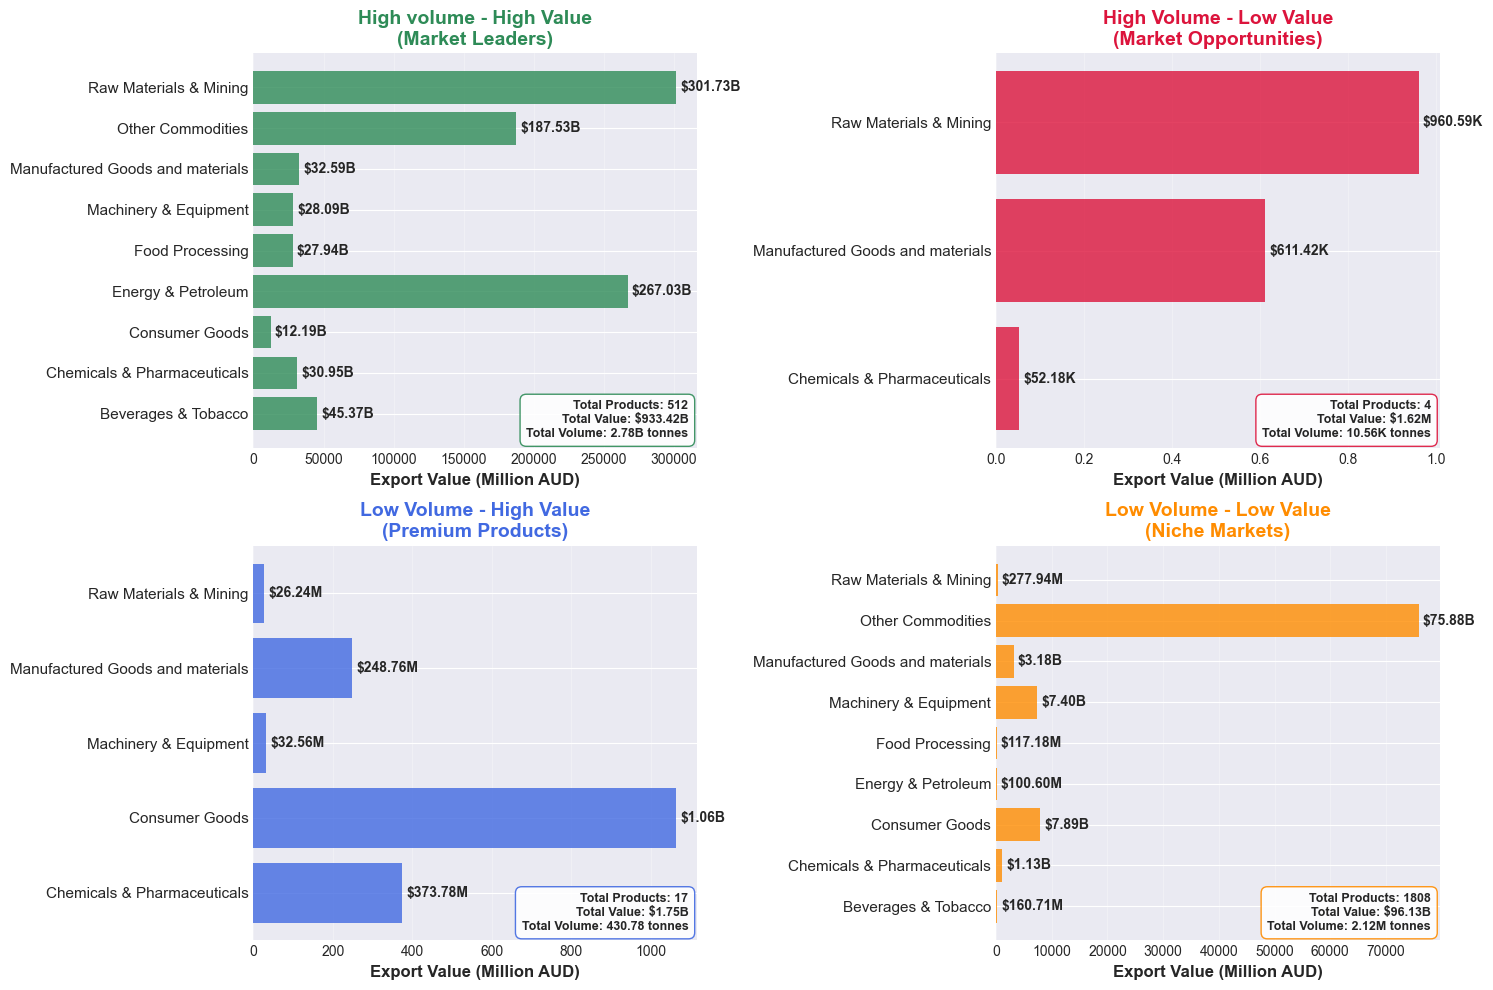


=== VOLUME VS. VALUE INSIGHTS ===
HIGH VOLUME - LOW VALUE OPPORTUNITIES:
   Products: 4
   Total Value: $0.00B
   Total Volume: 0.0M tonnes
   Avg Value per Tonne: $154
   Business Opportunity: Optimize pricing or processing for these high-volume products

 LOW VOLUME - HIGH VALUE PREMIUM PRODUCTS:
   Products: 17
   Total Value: $1.75B
   Total Volume: 0.0M tonnes
   Avg Value per Tonne: $4,050,830
   Business Opportunity: Focus on quality and premium positioning

 HIGH VOLUME - HIGH VALUE MARKET LEADERS:
   Products: 512
   Total Value: $933.42B
   Total Volume: 2778.6M tonnes
   Avg Value per Tonne: $336
   Business Strategy: Maintain market leadership and competitive advantage


In [17]:
# Stakeholder-Friendly Volume vs Value Analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Define strategic categories with descriptive titles
categories = {
    'High Volume - High Value': (ax1, '#2E8B57', 'High volume - High Value\n(Market Leaders)'),
    'High Volume - Low Value': (ax2, '#DC143C', 'High Volume - Low Value\n(Market Opportunities)'),
    'Low Volume - High Value': (ax3, '#4169E1', 'Low Volume - High Value\n(Premium Products)'),
    'Low Volume - Low Value': (ax4, '#FF8C00', 'Low Volume - Low Value\n(Niche Markets)')
}

# Create clean, simple charts for each strategic category
for category_name, (ax, color, title) in categories.items():
    # Get products in this category
    category_products = product_analysis[product_analysis['volume_value_category'] == category_name]
    
    if len(category_products) > 0:
        # Group by industry for cleaner visualization
        industry_summary = category_products.groupby('industry_category').agg({
            'value_fob_aud': 'sum',
            'gross_weight_tonnes': 'sum'
        }).round(2)
        
        # Function to format large numbers with proper suffixes
        def format_number(value, unit_type="value"):
            """Format numbers with B, M, K suffixes and appropriate decimal places"""
            if value >= 1e9:
                return f"{value/1e9:.2f}B"
            elif value >= 1e6:
                return f"{value/1e6:.2f}M"
            elif value >= 1e3:
                return f"{value/1e3:.2f}K"
            else:
                return f"{value:.2f}"
        
        # Function to format volume with appropriate units
        def format_volume(value):
            """Format volume values with appropriate units"""
            if value >= 1e9:
                return f"{value/1e9:.2f}B tonnes"
            elif value >= 1e6:
                return f"{value/1e6:.2f}M tonnes"
            elif value >= 1e3:
                return f"{value/1e3:.2f}K tonnes"
            else:
                return f"{value:.2f} tonnes"
        
        # Create horizontal bar chart showing industries
        industries = industry_summary.index
        values = industry_summary['value_fob_aud']
        
        # Create bars with consistent color
        bars = ax.barh(range(len(industries)), values / 1e6, color=color, alpha=0.8)
        
        # Set chart properties
        ax.set_yticks(range(len(industries)))
        ax.set_yticklabels(industries, fontsize=11)
        ax.set_xlabel('Export Value (Million AUD)', fontsize=12, fontweight='bold')
        ax.set_title(f'{title}', fontsize=14, fontweight='bold', color=color)
        ax.grid(axis='x', alpha=0.3)
        
        # Add value labels on bars with proper formatting
        for i, (bar, value) in enumerate(zip(bars, values)):
            width = bar.get_width()
            formatted_value = format_number(value)
            ax.text(width + max(values)/1e6*0.01, bar.get_y() + bar.get_height()/2,
                   f'${formatted_value}', ha='left', va='center', fontsize=10, fontweight='bold')
        
        # Add summary box with properly formatted values
        total_value = category_products['value_fob_aud'].sum()
        total_volume = category_products['gross_weight_tonnes'].sum()
        product_count = len(category_products)
        
        summary_text = f'Total Products: {product_count}\nTotal Value: ${format_number(total_value)}\nTotal Volume: {format_volume(total_volume)}'
        ax.text(0.98, 0.02, summary_text, transform=ax.transAxes, fontsize=9, fontweight='bold',
                verticalalignment='bottom', horizontalalignment='right',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9, edgecolor=color))
    else:
        # No products in this category
        ax.text(0.5, 0.5, f'No products\nin this category', 
                transform=ax.transAxes, fontsize=14, fontweight='bold',
                ha='center', va='center', color='gray',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))
        ax.set_title(f'{title}', fontsize=14, fontweight='bold', color=color)
        ax.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

# Summary insights
print("\n=== VOLUME VS. VALUE INSIGHTS ===")

# High Volume - Low Value opportunities
hv_lv_opportunities = product_analysis[product_analysis['volume_value_category'] == 'High Volume - Low Value']
if len(hv_lv_opportunities) > 0:
    total_hv_lv_value = hv_lv_opportunities['value_fob_aud'].sum()
    total_hv_lv_volume = hv_lv_opportunities['gross_weight_tonnes'].sum()
    print(f"HIGH VOLUME - LOW VALUE OPPORTUNITIES:")
    print(f"   Products: {len(hv_lv_opportunities)}")
    print(f"   Total Value: ${total_hv_lv_value/1e9:.2f}B")
    print(f"   Total Volume: {total_hv_lv_volume/1e6:.1f}M tonnes")
    print(f"   Avg Value per Tonne: ${(total_hv_lv_value/total_hv_lv_volume):,.0f}")
    print(f"   Business Opportunity: Optimize pricing or processing for these high-volume products")

# Low Volume - High Value premium products
lv_hv_premium = product_analysis[product_analysis['volume_value_category'] == 'Low Volume - High Value']
if len(lv_hv_premium) > 0:
    total_lv_hv_value = lv_hv_premium['value_fob_aud'].sum()
    total_lv_hv_volume = lv_hv_premium['gross_weight_tonnes'].sum()
    print(f"\n LOW VOLUME - HIGH VALUE PREMIUM PRODUCTS:")
    print(f"   Products: {len(lv_hv_premium)}")
    print(f"   Total Value: ${total_lv_hv_value/1e9:.2f}B")
    print(f"   Total Volume: {total_lv_hv_volume/1e6:.1f}M tonnes")
    print(f"   Avg Value per Tonne: ${(total_lv_hv_value/total_lv_hv_volume):,.0f}")
    print(f"   Business Opportunity: Focus on quality and premium positioning")

# High Volume - High Value leaders
hv_hv_leaders = product_analysis[product_analysis['volume_value_category'] == 'High Volume - High Value']
if len(hv_hv_leaders) > 0:
    total_hv_hv_value = hv_hv_leaders['value_fob_aud'].sum()
    total_hv_hv_volume = hv_hv_leaders['gross_weight_tonnes'].sum()
    print(f"\n HIGH VOLUME - HIGH VALUE MARKET LEADERS:")
    print(f"   Products: {len(hv_hv_leaders)}")
    print(f"   Total Value: ${total_hv_hv_value/1e9:.2f}B")
    print(f"   Total Volume: {total_hv_hv_volume/1e6:.1f}M tonnes")
    print(f"   Avg Value per Tonne: ${(total_hv_hv_value/total_hv_hv_volume):,.0f}")
    print(f"   Business Strategy: Maintain market leadership and competitive advantage")





In [18]:
# PRODUCT-MARKET ANALYSIS: "What are we exporting to whom?"
print("=== PRODUCT-MARKET ANALYSIS ===")
print("Goal: Identify how each product performs across destination countries")
print("=" * 60)

# Function to format large numbers with proper suffixes
def format_number(value):
    """Format numbers with B, M, K suffixes and appropriate decimal places"""
    if value >= 1e9:
        return f"{value/1e9:.2f}B"
    elif value >= 1e6:
        return f"{value/1e6:.2f}M"
    elif value >= 1e3:
        return f"{value/1e3:.2f}K"
    else:
        return f"{value:.2f}"

# 1. TOP PRODUCTS BY EXPORT VALUE
print("\n TOP 10 EXPORT PRODUCTS BY VALUE:")
top_products = df.groupby('product_description').agg({
    'value_fob_aud': 'sum',
    'gross_weight_tonnes': 'sum',
    'country_of_destination': 'nunique'
}).round(2)

top_products.columns = ['Total_Value', 'Total_Weight', 'Countries_Served']
top_products = top_products.sort_values('Total_Value', ascending=False).head(10)

for i, (product, row) in enumerate(top_products.iterrows(), 1):
    print(f"{i}. {product[:60]}...")
    print(f"   Export Value: ${format_number(row['Total_Value'])}")
    print(f"   Weight: {format_number(row['Total_Weight'])} tonnes")
    print(f"   Countries Served: {row['Countries_Served']}")
    print()

# 2. TOP DESTINATION COUNTRIES
print("\n🌍 TOP 15 DESTINATION COUNTRIES:")
top_countries = df.groupby('country_of_destination').agg({
    'value_fob_aud': 'sum',
    'gross_weight_tonnes': 'sum',
    'product_description': 'nunique'
}).round(2)

top_countries.columns = ['Total_Value', 'Total_Weight', 'Products_Imported']
top_countries = top_countries.sort_values('Total_Value', ascending=False).head(15)

for i, (country, row) in enumerate(top_countries.iterrows(), 1):
    print(f"{i}. {country}")
    print(f"   Import Value: ${format_number(row['Total_Value'])}")
    print(f"   Weight: {format_number(row['Total_Weight'])} tonnes")
    print(f"   Products Imported: {row['Products_Imported']}")
    print()

# 3. PRODUCT-COUNTRY MATRIX (Top combinations)
print("\n TOP PRODUCT-COUNTRY COMBINATIONS:")
product_country_matrix = df.groupby(['product_description', 'country_of_destination']).agg({
    'value_fob_aud': 'sum',
    'gross_weight_tonnes': 'sum'
}).round(2)

product_country_matrix.columns = ['Value', 'Weight']
top_combinations = product_country_matrix.sort_values('Value', ascending=False).head(15)

for i, ((product, country), row) in enumerate(top_combinations.iterrows(), 1):
    print(f"{i}. {product[:40]}... → {country}")
    print(f"   Export Value: ${format_number(row['Value'])}")
    print(f"   Weight: {format_number(row['Weight'])} tonnes")
    print()


=== PRODUCT-MARKET ANALYSIS ===
Goal: Identify how each product performs across destination countries

 TOP 10 EXPORT PRODUCTS BY VALUE:


1. Iron ore and concentrates, not agglomerated...
   Export Value: $201.60B
   Weight: 1.57B tonnes
   Countries Served: 20.0

2. Special transactions and commodities not classified accordin...
   Export Value: $138.85B
   Weight: 196.46M tonnes
   Countries Served: 169.0

3. Bituminous coal, whether or not pulverized, not agglomerated...
   Export Value: $126.53B
   Weight: 589.69M tonnes
   Countries Served: 41.0

4. Natural gas, liquefied...
   Export Value: $108.84B
   Weight: 133.38M tonnes
   Countries Served: 1.0

5. Non-monetary gold (incl. gold plated with platinum) unwrough...
   Export Value: $73.46B
   Weight: 648.70 tonnes
   Countries Served: 43.0

6. Commodities and transactions not classified elsewhere in the...
   Export Value: $44.92B
   Weight: 1.82M tonnes
   Countries Served: 130.0

7. Metalliferous ores and metal scrap...
   Export Value: $29.54B
   Weight: 33.22M tonnes
   Countries Served: 33.0

8. Petroleum oils and oils obtained from bituminous minerals, c...


1. China
   Import Value: $293.73B
   Weight: 1.64B tonnes
   Products Imported: 1491.0

2. No Country Details
   Import Value: $133.72B
   Weight: 191.97M tonnes
   Products Imported: 28.0

3. Japan
   Import Value: $112.58B
   Weight: 322.81M tonnes
   Products Imported: 1339.0

4. United States of America
   Import Value: $64.17B
   Weight: 4.65M tonnes
   Products Imported: 1738.0

5. Korea, Republic of (South)
   Import Value: $63.77B
   Weight: 166.45M tonnes
   Products Imported: 1175.0

6. Singapore
   Import Value: $42.19B
   Weight: 24.77M tonnes
   Products Imported: 1626.0

7. India
   Import Value: $38.20B
   Weight: 84.65M tonnes
   Products Imported: 1177.0

8. Taiwan
   Import Value: $29.50B
   Weight: 79.22M tonnes
   Products Imported: 1046.0

9. United Kingdom, Channel Islands and Isle of Man, nfd
   Import Value: $24.15B
   Weight: 1.47M tonnes
   Products Imported: 1346.0

10. Indonesia
   Import Value: $23.63B
   Weight: 38.05M tonnes
   Products Imported: 1340.0


1. Iron ore and concentrates, not agglomera... → China
   Export Value: $171.06B
   Weight: 1.34B tonnes

2. Natural gas, liquefied... → No Country Details
   Export Value: $108.84B
   Weight: 133.38M tonnes

3. Bituminous coal, whether or not pulveriz... → Japan
   Export Value: $39.74B
   Weight: 176.82M tonnes

4. Special transactions and commodities not... → Japan
   Export Value: $39.45B
   Weight: 47.32M tonnes

5. Special transactions and commodities not... → China
   Export Value: $36.39B
   Weight: 56.36M tonnes

6. Bituminous coal, whether or not pulveriz... → India
   Export Value: $20.43B
   Weight: 72.03M tonnes

7. Bituminous coal, whether or not pulveriz... → China
   Export Value: $17.96B
   Weight: 129.54M tonnes

8. Non-monetary gold (incl. gold plated wit... → United Kingdom, Channel Islands and Isle of Man, nfd
   Export Value: $17.23B
   Weight: 125.50 tonnes

9. Non-monetary gold (incl. gold plated wit... → United States of America
   Export Value: $16.61B
   Weig

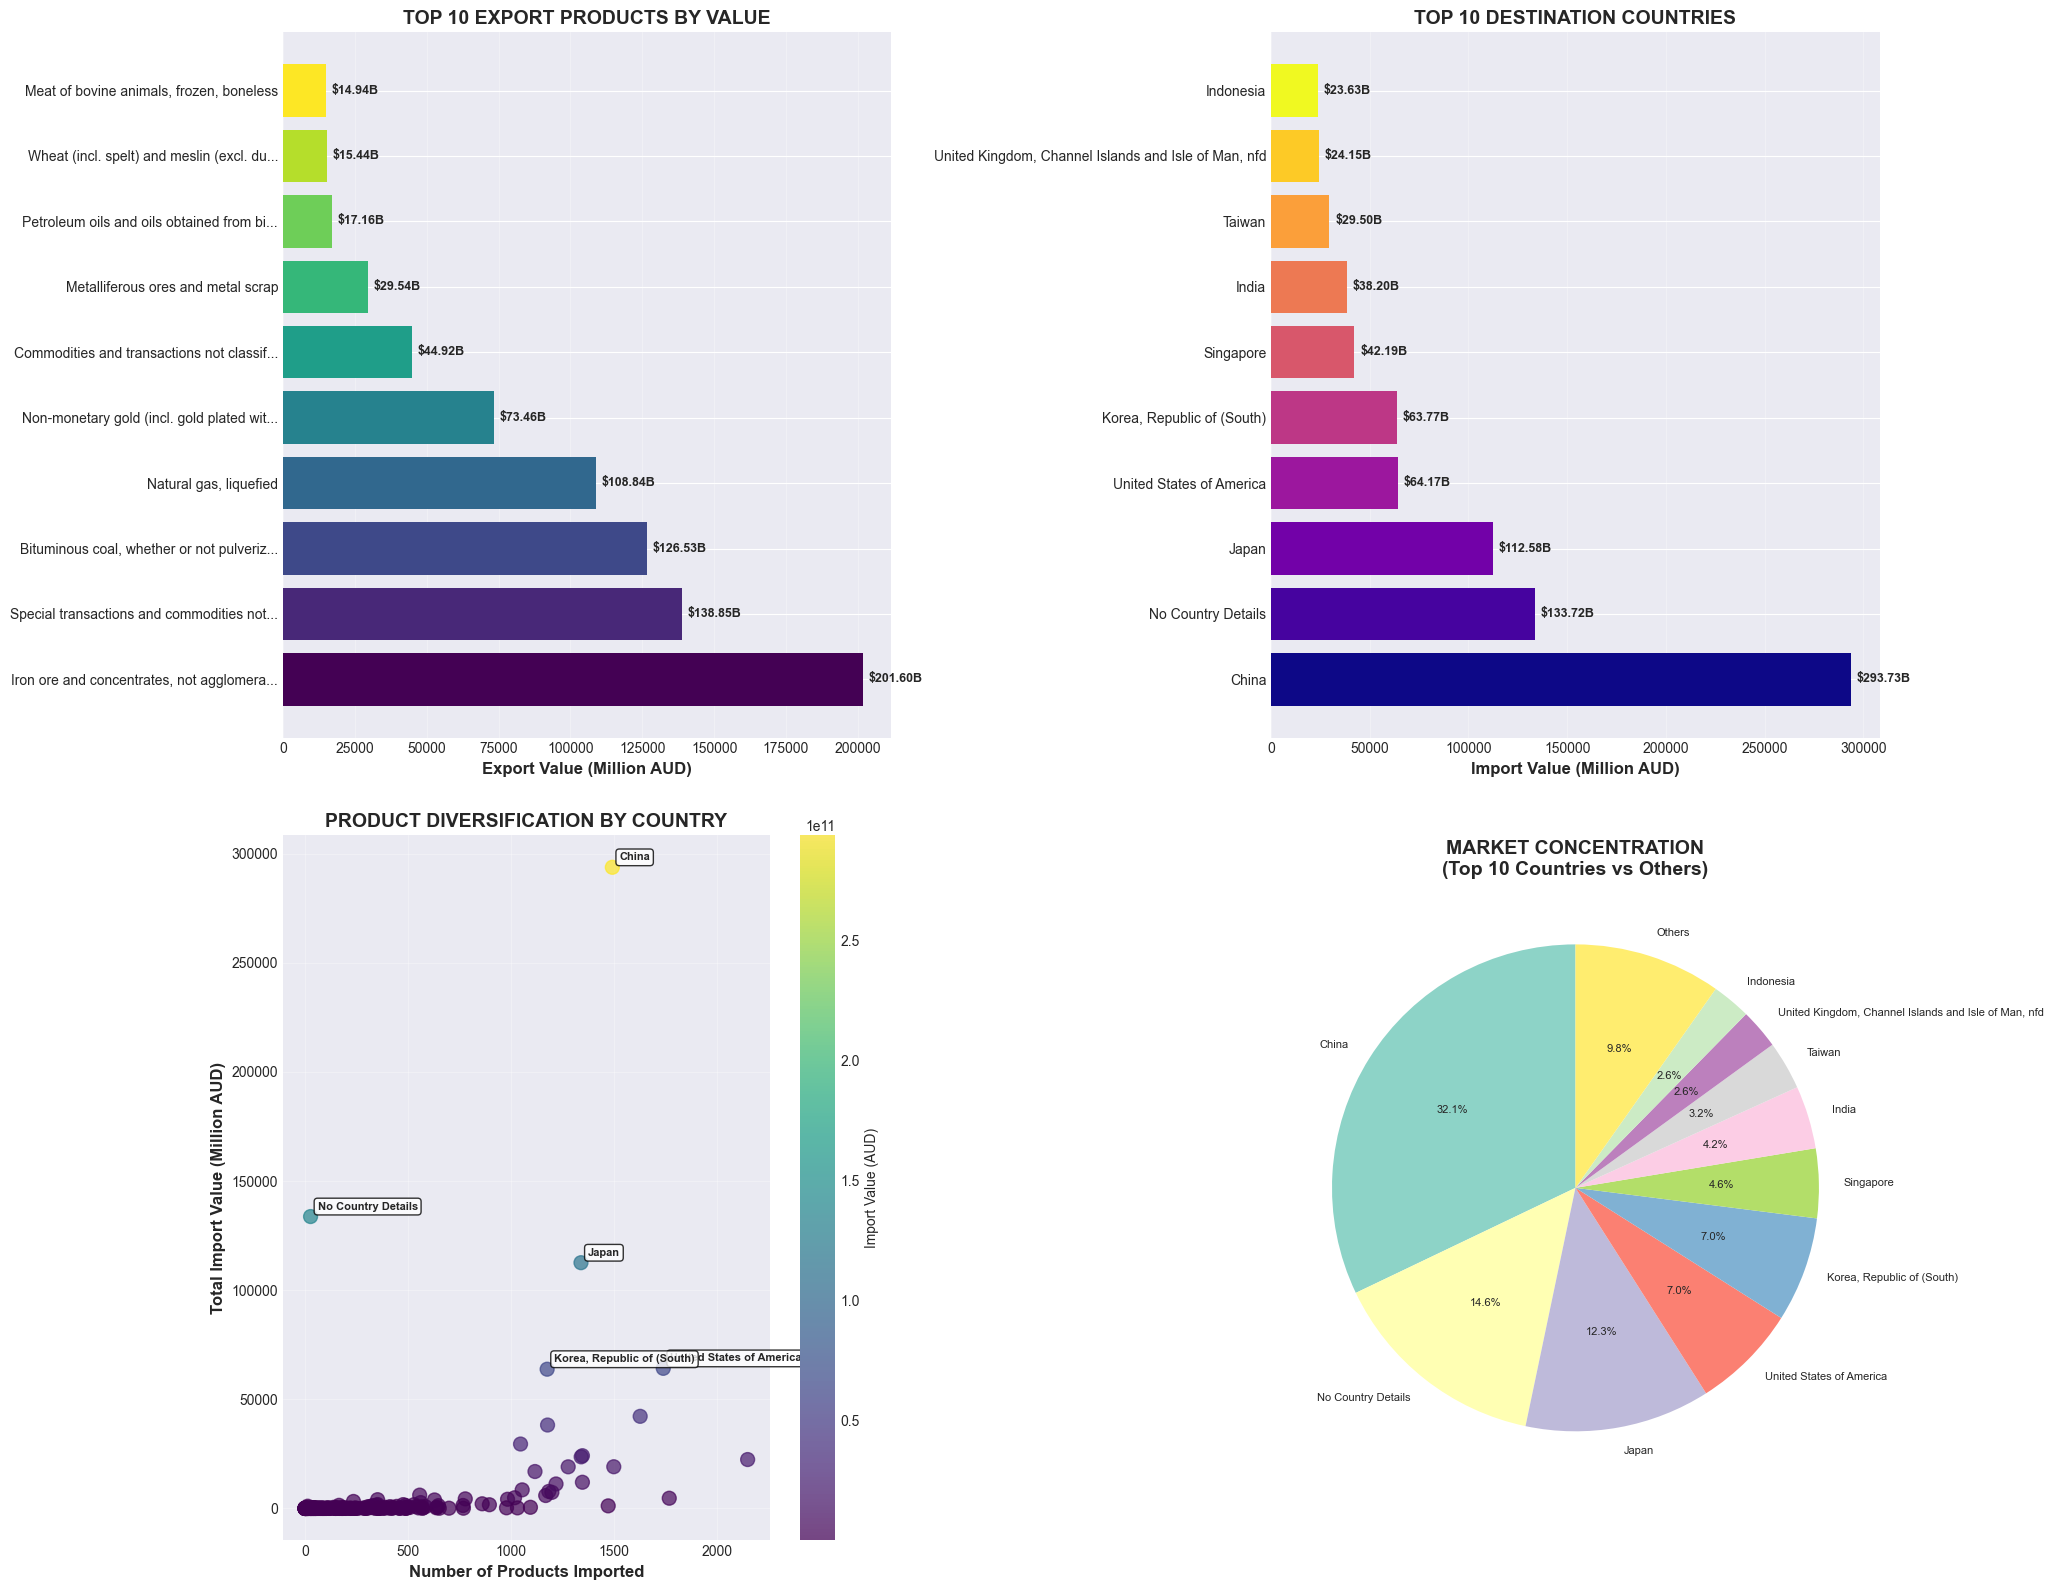


 PRODUCT-MARKET ANALYSIS SUMMARY:
 Top Export Product: Iron ore and concentrates, not agglomerated
 Export Value: $201.60B
 Countries Served: 20.0
Top Destination Country: China
 Import Value: $293.73B
 Products Imported: 1491.0

 Market Concentration:
   Top 5 countries: 73.0% of total exports
   Top 10 countries: 90.2% of total exports

 Key Insights:
   • Iron ore and concentrates, not agglomerated... is Australia's most valuable export
   • China is Australia's largest export market
   • Market is highly concentrated in top destinations
   • Diversification opportunity: 219 countries served


In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# 1. TOP PRODUCTS BY EXPORT VALUE (Horizontal Bar Chart)
top_10_products = top_products.head(10)
bars1 = ax1.barh(range(len(top_10_products)), top_10_products['Total_Value'] / 1e6, 
                 color=plt.cm.viridis(np.linspace(0, 1, len(top_10_products))))

ax1.set_yticks(range(len(top_10_products)))
ax1.set_yticklabels([prod[:40] + '...' if len(prod) > 40 else prod for prod in top_10_products.index], fontsize=10)
ax1.set_xlabel('Export Value (Million AUD)', fontsize=12, fontweight='bold')
ax1.set_title('TOP 10 EXPORT PRODUCTS BY VALUE', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars1, top_10_products['Total_Value'])):
    width = bar.get_width()
    ax1.text(width + max(top_10_products['Total_Value'])/1e6*0.01, bar.get_y() + bar.get_height()/2,
             f'${format_number(value)}', ha='left', va='center', fontsize=9, fontweight='bold')

# 2. TOP DESTINATION COUNTRIES (Horizontal Bar Chart)
top_10_countries = top_countries.head(10)
bars2 = ax2.barh(range(len(top_10_countries)), top_10_countries['Total_Value'] / 1e6,
                 color=plt.cm.plasma(np.linspace(0, 1, len(top_10_countries))))

ax2.set_yticks(range(len(top_10_countries)))
ax2.set_yticklabels(top_10_countries.index, fontsize=10)
ax2.set_xlabel('Import Value (Million AUD)', fontsize=12, fontweight='bold')
ax2.set_title('TOP 10 DESTINATION COUNTRIES', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars2, top_10_countries['Total_Value'])):
    width = bar.get_width()
    ax2.text(width + max(top_10_countries['Total_Value'])/1e6*0.01, bar.get_y() + bar.get_height()/2,
             f'${format_number(value)}', ha='left', va='center', fontsize=9, fontweight='bold')

# 3. PRODUCT DIVERSIFICATION BY COUNTRY (Scatter Plot)
country_product_diversity = df.groupby('country_of_destination').agg({
    'value_fob_aud': 'sum',
    'product_description': 'nunique'
}).round(2)

scatter = ax3.scatter(country_product_diversity['product_description'], 
                      country_product_diversity['value_fob_aud'] / 1e6,
                      c=country_product_diversity['value_fob_aud'], 
                      cmap='viridis', s=100, alpha=0.7)

ax3.set_xlabel('Number of Products Imported', fontsize=12, fontweight='bold')
ax3.set_ylabel('Total Import Value (Million AUD)', fontsize=12, fontweight='bold')
ax3.set_title('PRODUCT DIVERSIFICATION BY COUNTRY', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('Import Value (AUD)', fontsize=10)

# Highlight top countries
top_5_countries_names = top_countries.head(5).index
for country in top_5_countries_names:
    if country in country_product_diversity.index:
        x = country_product_diversity.loc[country, 'product_description']
        y = country_product_diversity.loc[country, 'value_fob_aud'] / 1e6
        ax3.annotate(country, (x, y), xytext=(5, 5), textcoords='offset points',
                    fontsize=8, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# 4. MARKET CONCENTRATION ANALYSIS (Pie Chart)
# Top 10 countries market share
top_10_share = top_countries.head(10)['Total_Value']
others_share = top_countries.iloc[10:]['Total_Value'].sum()
market_share_data = list(top_10_share.values) + [others_share]
market_share_labels = list(top_10_share.index) + ['Others']

colors = plt.cm.Set3(np.linspace(0, 1, len(market_share_data)))
wedges, texts, autotexts = ax4.pie(market_share_data, labels=market_share_labels,
                                   autopct='%1.1f%%', colors=colors, startangle=90,
                                   textprops={'fontsize': 8})

ax4.set_title('MARKET CONCENTRATION\n(Top 10 Countries vs Others)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Summary Statistics
print("\n PRODUCT-MARKET ANALYSIS SUMMARY:")
print(f" Top Export Product: {top_products.index[0]}")
print(f" Export Value: ${format_number(top_products.iloc[0]['Total_Value'])}")
print(f" Countries Served: {top_products.iloc[0]['Countries_Served']}")

print(f"Top Destination Country: {top_countries.index[0]}")
print(f" Import Value: ${format_number(top_countries.iloc[0]['Total_Value'])}")
print(f" Products Imported: {top_countries.iloc[0]['Products_Imported']}")

print(f"\n Market Concentration:")
top_5_share = top_countries.head(5)['Total_Value'].sum() / top_countries['Total_Value'].sum() * 100
top_10_share_pct = top_countries.head(10)['Total_Value'].sum() / top_countries['Total_Value'].sum() * 100
print(f"   Top 5 countries: {top_5_share:.1f}% of total exports")
print(f"   Top 10 countries: {top_10_share_pct:.1f}% of total exports")

print(f"\n Key Insights:")
print(f"   • {top_products.index[0][:50]}... is Australia's most valuable export")
print(f"   • {top_countries.index[0]} is Australia's largest export market")
print(f"   • Market is {('highly' if top_5_share > 50 else 'moderately')} concentrated in top destinations")
print(f"   • Diversification opportunity: {len(df['country_of_destination'].unique())} countries served")

##### This code calculates how exports from Australia to each destination country have grown or declined from 2024 to 2025 that’s called Year-over-Year (YoY) Growth.

In [20]:
# YOY GROWTH ANALYSIS BY COUNTRY (2024 → 2025)
print("=== YEAR-OVER-YEAR GROWTH ANALYSIS BY COUNTRY ===")

# Calculate export values by country and year
country_yearly = df.groupby(['country_of_destination', 'year'])['value_fob_aud'].sum().unstack(fill_value=0)

# Calculate YoY growth
if 2024 in country_yearly.columns and 2025 in country_yearly.columns:
    country_yearly['YoY_Growth_%'] = ((country_yearly[2025] - country_yearly[2024]) / country_yearly[2024] * 100).round(2)
    country_yearly['YoY_Growth_Absolute'] = (country_yearly[2025] - country_yearly[2024]) / 1e9  # in billions
    
    # Filter countries with significant trade volume (at least $1B in 2024)
    significant_countries = country_yearly[country_yearly[2024] >= 1e9].copy()
    
    # Sort by YoY growth
    significant_countries = significant_countries.sort_values('YoY_Growth_%', ascending=False)
    
    print(f"Countries analyzed: {len(significant_countries)} (minimum $1B in 2024)")
    print("\n TOP 10 FASTEST GROWING MARKETS:")
    print("=" * 80)
    for i, (country, row) in enumerate(significant_countries.head(10).iterrows(), 1):
        growth_pct = row['YoY_Growth_%']
        growth_abs = row['YoY_Growth_Absolute']
        value_2024 = row[2024] / 1e9
        value_2025 = row[2025] / 1e9
        
        if growth_pct > 0:
            emoji = "📈"
        else:
            emoji = "📉"
            
        print(f"{i:2d}. {country[:40]:<40} {emoji} {growth_pct:>6.1f}% (${growth_abs:>+6.1f}B)")
        print(f"    2024: ${value_2024:.1f}B → 2025: ${value_2025:.1f}B")
    
    print("\n📉 TOP 10 DECLINING MARKETS:")
    print("=" * 80)
    declining_countries = significant_countries.tail(10).sort_values('YoY_Growth_%', ascending=True)
    for i, (country, row) in enumerate(declining_countries.iterrows(), 1):
        growth_pct = row['YoY_Growth_%']
        growth_abs = row['YoY_Growth_Absolute']
        value_2024 = row[2024] / 1e9
        value_2025 = row[2025] / 1e9
        
        print(f"{i:2d}. {country[:40]:<40} 📉 {growth_pct:>6.1f}% (${growth_abs:>+6.1f}B)")
        print(f"    2024: ${value_2024:.1f}B → 2025: ${value_2025:.1f}B")
    
    # Summary statistics
    avg_growth = significant_countries['YoY_Growth_%'].mean()
    positive_growth = (significant_countries['YoY_Growth_%'] > 0).sum()
    total_countries = len(significant_countries)
    
    print(f"\n📊 GROWTH SUMMARY:")
    print(f"   Average YoY Growth: {avg_growth:.1f}%")
    print(f"   Countries with Positive Growth: {positive_growth}/{total_countries} ({positive_growth/total_countries*100:.1f}%)")
    print(f"   Countries with Negative Growth: {total_countries-positive_growth}/{total_countries} ({(total_countries-positive_growth)/total_countries*100:.1f}%)")

else:
    print("❌ Cannot calculate YoY growth - missing 2024 or 2025 data")
    print(f"Available years: {sorted(df['year'].unique())}")

print("✅ YoY Growth Analysis completed!")

=== YEAR-OVER-YEAR GROWTH ANALYSIS BY COUNTRY ===
Countries analyzed: 33 (minimum $1B in 2024)

 TOP 10 FASTEST GROWING MARKETS:
 1. United Kingdom, Channel Islands and Isle 📈   32.3% ($  +3.4B)
    2024: $10.4B → 2025: $13.8B
 2. South Africa                             📈   19.4% ($  +0.4B)
    2024: $2.2B → 2025: $2.7B
 3. Belgium                                  📈    5.0% ($  +0.1B)
    2024: $2.1B → 2025: $2.2B
 4. United States of America                 📈    0.9% ($  +0.3B)
    2024: $31.9B → 2025: $32.2B
 5. Saudi Arabia                             📉  -12.6% ($  -0.1B)
    2024: $1.1B → 2025: $1.0B
 6. Switzerland (includes Liechtenstein)     📉  -15.0% ($  -0.3B)
    2024: $2.1B → 2025: $1.8B
 7. Canada                                   📉  -16.5% ($  -0.5B)
    2024: $3.2B → 2025: $2.7B
 8. Bahrain                                  📉  -26.2% ($  -0.6B)
    2024: $2.3B → 2025: $1.7B
 9. Papua New Guinea                         📉  -30.8% ($  -0.8B)
    2024: $2.8B → 2025: $1.9B
10.

=== TOP 15 PORTS BY TONNAGE ===



 TOP 15 PORTS BY TONNAGE:
--------------------------------------------------------------------------------
Rank Port Name                                          Tonnage (M tonnes)
--------------------------------------------------------------------------------
1    Port Hedland                                       946.0             
2    Dampier (King Bay)                                 283.4             
3    Port Walcott                                       283.2             
4    Newcastle                                          249.9             
5    Conf Aust Ports                                    196.3             
6    Hay Point                                          161.4             
7    Gladstone                                          154.3             
8    Abbot Point                                        58.0              
9    Weipa                                              49.6              
10   Offshore Ports - Western Australia                 43.1 

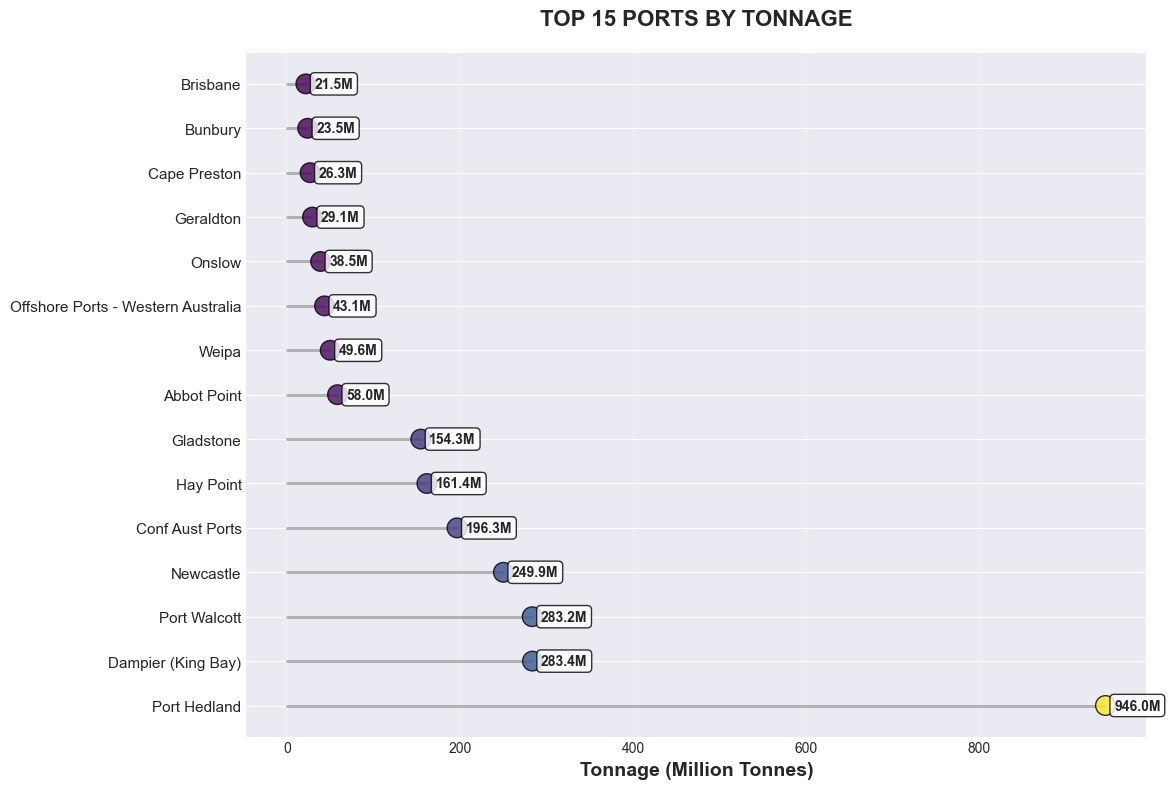

In [21]:




# TOP 15 PORTS - LOLLIPOP CHART VERSION
print("=== TOP 15 PORTS BY TONNAGE ===")

# Group by port of loading and calculate total tonnage
port_tonnage = df.groupby('port_of_loading')['gross_weight_tonnes'].sum().reset_index()
port_tonnage = port_tonnage.sort_values('gross_weight_tonnes', ascending=False)
port_tonnage['tonnage_millions'] = port_tonnage['gross_weight_tonnes'] / 1e6
top_15_ports = port_tonnage.head(15)

# Display the data first
print(f"\n TOP 15 PORTS BY TONNAGE:")
print("-" * 80)
print(f"{'Rank':<4} {'Port Name':<50} {'Tonnage (M tonnes)':<18}")
print("-" * 80)

for i, (_, row) in enumerate(top_15_ports.iterrows(), 1):
    port_name = row['port_of_loading']
    print(f"{i:<4} {port_name:<50} {row['tonnage_millions']:<18.1f}")

print(f"\n SUMMARY:")
print(f"   Total ports analyzed: {len(port_tonnage)}")
print(f"   Total tonnage: {port_tonnage['gross_weight_tonnes'].sum()/1e6:.1f}M tonnes")



# Use a large figure size
plt.figure(figsize=(12, 8))

# First, draw the horizontal lines (the "sticks")
for i, (_, row) in enumerate(top_15_ports.iterrows()):
    plt.plot([0, row['tonnage_millions']], [i, i], color='gray', alpha=0.6, linewidth=2)

# Then, add the dots (the "lollipops") at the end of each line
scatter = plt.scatter(top_15_ports['tonnage_millions'], range(len(top_15_ports)), 
                     c=top_15_ports['tonnage_millions'], cmap='viridis', s=200, alpha=0.8, 
                     edgecolors='black', linewidth=1, zorder=3)

# Set up the chart
plt.yticks(range(len(top_15_ports)), 
           [port for port in top_15_ports['port_of_loading']],
           fontsize=11)

plt.xlabel('Tonnage (Million Tonnes)', fontsize=14, fontweight='bold')
plt.title('TOP 15 PORTS BY TONNAGE', fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)

# Add value labels on the dots
for i, (_, row) in enumerate(top_15_ports.iterrows()):
    plt.text(row['tonnage_millions'] + 10, i, f'{row["tonnage_millions"]:.1f}M', 
             ha='left', va='center', fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Clean layout
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.95)

plt.show()


In [22]:
# AVERAGE VALUE PER SHIPMENT PER PORT - OPERATIONAL EFFICIENCY ANALYSIS
print("=== AVERAGE VALUE PER SHIPMENT PER PORT - OPERATIONAL EFFICIENCY ===")

# Calculate port metrics focusing on shipment value efficiency
port_efficiency = df.groupby('port_of_loading').agg({
    'value_fob_aud': 'sum',
    'country_of_destination': 'count'  # Count of shipments/records
}).reset_index()

port_efficiency = port_efficiency.rename(columns={'country_of_destination': 'shipment_count'})

# Calculate key efficiency metrics
port_efficiency['avg_value_per_shipment'] = port_efficiency['value_fob_aud'] / port_efficiency['shipment_count']
port_efficiency['total_value_millions'] = port_efficiency['value_fob_aud'] / 1e6
port_efficiency['shipments_per_day'] = port_efficiency['shipment_count'] / 730  # 2 years of data

# Filter for ports with significant activity (at least 50 shipments)
significant_ports = port_efficiency[port_efficiency['shipment_count'] >= 50].copy()
significant_ports = significant_ports.sort_values('avg_value_per_shipment', ascending=False)

print(f" ANALYSIS SCOPE:")
print(f"   Total ports analyzed: {len(port_efficiency)}")
print(f"   Significant ports (≥50 shipments): {len(significant_ports)}")
print(f"   Total shipments: {port_efficiency['shipment_count'].sum():,}")
print(f"   Total export value: ${port_efficiency['value_fob_aud'].sum()/1e9:.1f}B")

# Calculate industry benchmarks
avg_value_per_shipment = significant_ports['avg_value_per_shipment'].mean()
avg_shipments_per_day = significant_ports['shipments_per_day'].mean()

print(f"\nINDUSTRY BENCHMARKS:")
print(f"   Average value per shipment: ${avg_value_per_shipment:,.0f}")
print(f"   Average shipments per day: {avg_shipments_per_day:.1f}")

# 1. HIGH-VALUE OPERATIONS (Premium Ports)
print(f"\nHIGH-VALUE OPERATIONS (Premium Ports):")
print("=" * 90)
print("These ports handle high-value cargo with efficient operations")
print("-" * 90)
print(f"{'Rank':<4} {'Port Name':<35} {'Avg Value/Shipment':<18} {'Total Shipments':<15} {'Shipments/Day':<15}")
print("-" * 90)

high_value_ports = significant_ports.head(15)
for i, (_, row) in enumerate(high_value_ports.iterrows(), 1):
    port_name = row['port_of_loading'][:32] + '...' if len(row['port_of_loading']) > 35 else row['port_of_loading']
    print(f"{i:<4} {port_name:<35} ${row['avg_value_per_shipment']:<17,.0f} {row['shipment_count']:<14,} {row['shipments_per_day']:<14.1f}")

# 2. POTENTIAL CONGESTION INDICATORS (High Volume, Low Value)
print(f"\n POTENTIAL CONGESTION INDICATORS:")
print("=" * 90)
print("These ports have high shipment volume but low value per shipment")
print("→ Possible congestion from many small shipments or bulk commodities")
print("-" * 90)
print(f"{'Rank':<4} {'Port Name':<35} {'Avg Value/Shipment':<18} {'Total Shipments':<15} {'Shipments/Day':<15}")
print("-" * 90)

# Identify ports with high shipment volume but low value per shipment
congestion_risk = significant_ports.copy()
congestion_risk['congestion_score'] = (congestion_risk['shipments_per_day'] / congestion_risk['shipments_per_day'].max()) - (congestion_risk['avg_value_per_shipment'] / congestion_risk['avg_value_per_shipment'].max())

high_congestion_risk = congestion_risk.nlargest(15, 'congestion_score')
for i, (_, row) in enumerate(high_congestion_risk.iterrows(), 1):
    port_name = row['port_of_loading'][:32] + '...' if len(row['port_of_loading']) > 35 else row['port_of_loading']
    print(f"{i:<4} {port_name:<35} ${row['avg_value_per_shipment']:<17,.0f} {row['shipment_count']:<14,} {row['shipments_per_day']:<14.1f}")

# 3. EFFICIENCY CATEGORIZATION
print(f"\nPORT EFFICIENCY CATEGORIZATION:")
print("=" * 80)

# Define efficiency thresholds
high_value_threshold = significant_ports['avg_value_per_shipment'].quantile(0.75)
high_volume_threshold = significant_ports['shipments_per_day'].quantile(0.75)

# Categorize ports
significant_ports['efficiency_category'] = 'Standard'
significant_ports.loc[
    (significant_ports['avg_value_per_shipment'] >= high_value_threshold) & 
    (significant_ports['shipments_per_day'] >= high_volume_threshold), 'efficiency_category'
] = 'High Efficiency (High Value + High Volume)'
significant_ports.loc[
    (significant_ports['avg_value_per_shipment'] >= high_value_threshold) & 
    (significant_ports['shipments_per_day'] < high_volume_threshold), 'efficiency_category'
] = 'Premium Operations (High Value, Low Volume)'
significant_ports.loc[
    (significant_ports['avg_value_per_shipment'] < high_value_threshold) & 
    (significant_ports['shipments_per_day'] >= high_volume_threshold), 'efficiency_category'
] = 'Bulk Operations (Low Value, High Volume)'

# Count ports in each category
efficiency_counts = significant_ports['efficiency_category'].value_counts()
print("Port Distribution by Efficiency Category:")
for category, count in efficiency_counts.items():
    print(f"   {category}: {count} ports")

# 4. KEY INSIGHTS
print(f"\nKEY OPERATIONAL INSIGHTS:")
print("=" * 80)

print(f" TOP PERFORMERS:")
high_efficiency = efficiency_counts.get('High Efficiency (High Value + High Volume)', 0)
premium_ops = efficiency_counts.get('Premium Operations (High Value, Low Volume)', 0)
print(f"   High Efficiency Ports: {high_efficiency} (handle both high value and high volume)")
print(f"   Premium Operations: {premium_ops} (specialized high-value cargo)")

print(f"\n ATTENTION NEEDED:")
bulk_ops = efficiency_counts.get('Bulk Operations (Low Value, High Volume)', 0)
print(f"   Bulk Operations: {bulk_ops} (high volume but low value - potential congestion)")

print(f"\nEFFICIENCY METRICS:")
print(f"   Average value per shipment: ${significant_ports['avg_value_per_shipment'].mean():,.0f}")
print(f"   Highest value per shipment: ${significant_ports['avg_value_per_shipment'].max():,.0f}")
print(f"   Lowest value per shipment: ${significant_ports['avg_value_per_shipment'].min():,.0f}")

print("Average Value per Shipment Analysis completed!")


=== AVERAGE VALUE PER SHIPMENT PER PORT - OPERATIONAL EFFICIENCY ===


 ANALYSIS SCOPE:
   Total ports analyzed: 74
   Significant ports (≥50 shipments): 48
   Total shipments: 1,479,965
   Total export value: $1031.3B

INDUSTRY BENCHMARKS:
   Average value per shipment: $17,974,389
   Average shipments per day: 42.2

HIGH-VALUE OPERATIONS (Premium Ports):
These ports handle high-value cargo with efficient operations
------------------------------------------------------------------------------------------
Rank Port Name                           Avg Value/Shipment Total Shipments Shipments/Day  
------------------------------------------------------------------------------------------
1    Port Walcott                        $100,696,516       367            0.5           
2    Port Hedland                        $97,942,661        1,269          1.7           
3    Offshore Ports - Western Australia  $86,937,022        393            0.5           
4    Onslow                              $81,844,330        227            0.3           
5    Dampier (Ki

=== CLEAN AVERAGE VALUE PER SHIPMENT VISUALIZATIONS ===
Creating Top 15 High-Value Ports Chart...
 Creating Lowest 15 Value Ports Chart...


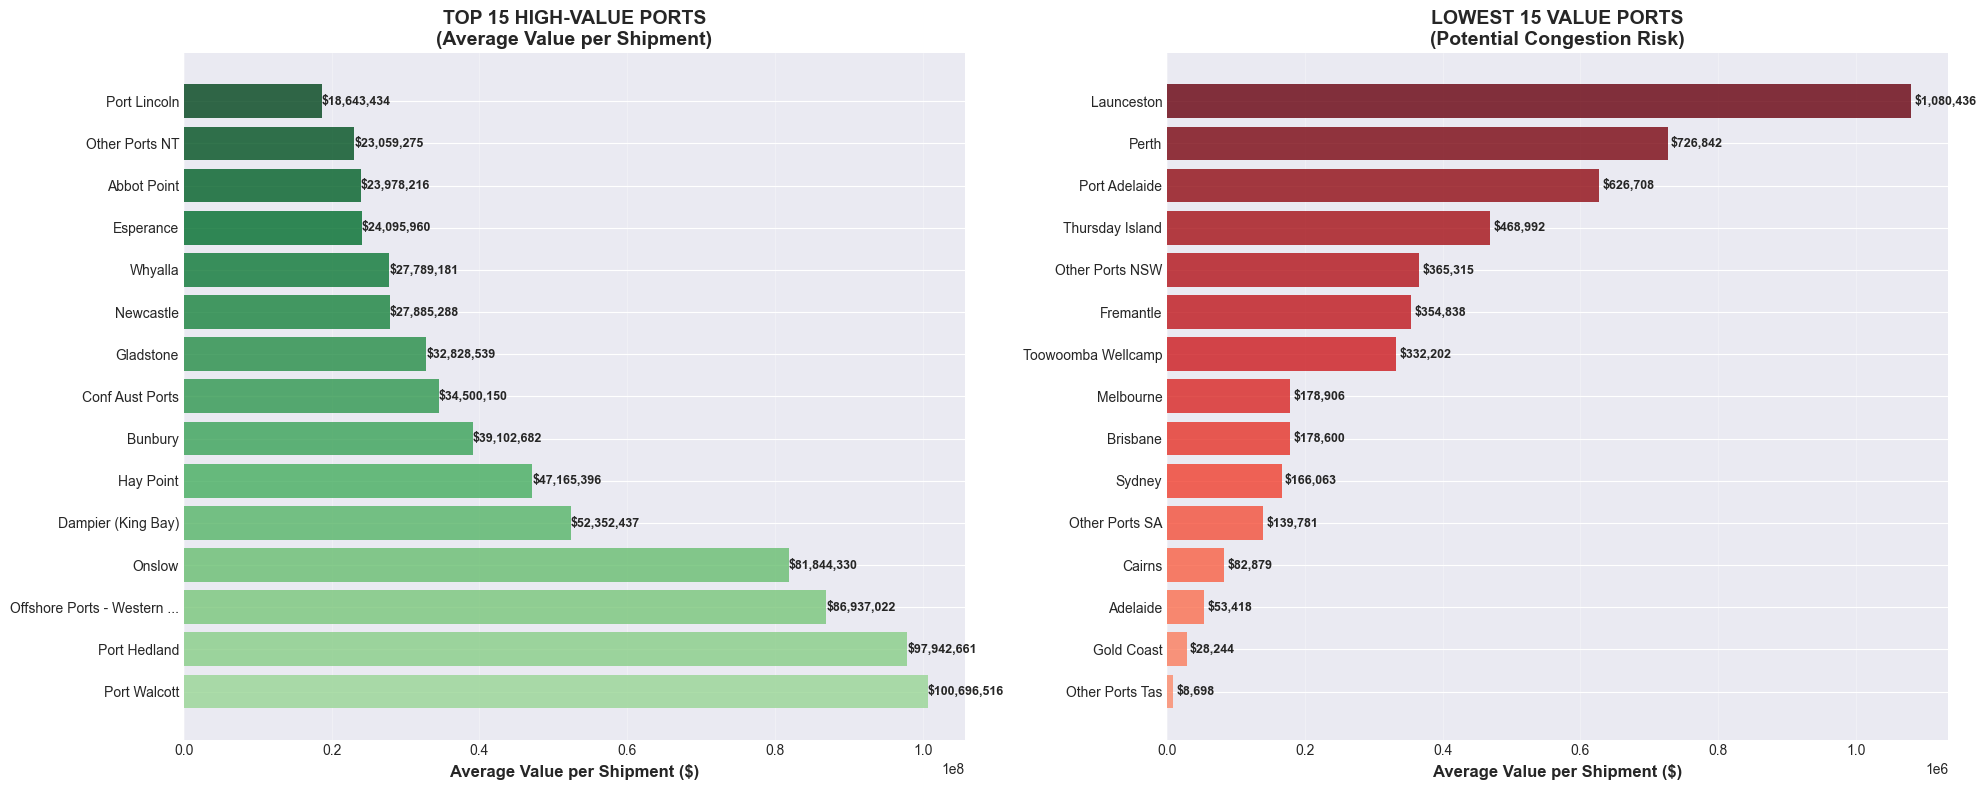

In [23]:
# CLEAN AVERAGE VALUE PER SHIPMENT VISUALIZATIONS - 2 CHARTS ONLY
print("=== CLEAN AVERAGE VALUE PER SHIPMENT VISUALIZATIONS ===")

# Create ONLY 2 visualizations as requested
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 1. TOP 15 HIGH-VALUE PORTS
print("Creating Top 15 High-Value Ports Chart...")

top_15_high_value = significant_ports.head(15)
bars1 = ax1.barh(range(len(top_15_high_value)), top_15_high_value['avg_value_per_shipment'], 
                 color=plt.cm.Greens(np.linspace(0.4, 1, len(top_15_high_value))), alpha=0.8)

ax1.set_yticks(range(len(top_15_high_value)))
ax1.set_yticklabels([port[:25] + '...' if len(port) > 28 else port for port in top_15_high_value['port_of_loading']], fontsize=10)
ax1.set_xlabel('Average Value per Shipment ($)', fontsize=12, fontweight='bold')
ax1.set_title('TOP 15 HIGH-VALUE PORTS\n(Average Value per Shipment)', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars1, top_15_high_value['avg_value_per_shipment'])):
    width = bar.get_width()
    ax1.text(width + 10000, bar.get_y() + bar.get_height()/2,
             f'${value:,.0f}', ha='left', va='center', fontsize=9, fontweight='bold')

# 2. LOWEST 15 VALUE PORTS (Potential Congestion)
print(" Creating Lowest 15 Value Ports Chart...")

lowest_15_value = significant_ports.nsmallest(15, 'avg_value_per_shipment')
bars2 = ax2.barh(range(len(lowest_15_value)), lowest_15_value['avg_value_per_shipment'], 
                 color=plt.cm.Reds(np.linspace(0.4, 1, len(lowest_15_value))), alpha=0.8)

ax2.set_yticks(range(len(lowest_15_value)))
ax2.set_yticklabels([port[:25] + '...' if len(port) > 28 else port for port in lowest_15_value['port_of_loading']], fontsize=10)
ax2.set_xlabel('Average Value per Shipment ($)', fontsize=12, fontweight='bold')
ax2.set_title('LOWEST 15 VALUE PORTS\n(Potential Congestion Risk)', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars2, lowest_15_value['avg_value_per_shipment'])):
    width = bar.get_width()
    ax2.text(width + 5000, bar.get_y() + bar.get_height()/2,
             f'${value:,.0f}', ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()




=== EXPORT SHARE BY REGION ANALYSIS ===



Countries mapped to 'Other' (7 countries):
   • Antarctica, nfd
   • Australia (Re-imports)
   • International Waters
   • No Country Details
   • Ship and Aircraft Stores
   • Unknown
   • Unknown Country

Combined 2 small regions with 'Other' category
Small regions combined: South America, Central America & Caribbean

REGIONAL EXPORT SHARE:
1. Asia-Pacific                69.6% ($ 717.9B)
2. Other                       14.1% ($ 145.0B)
3. North America                6.9% ($  71.5B)
4. Europe                       6.1% ($  63.2B)
5. Middle East & Africa         3.3% ($  33.7B)


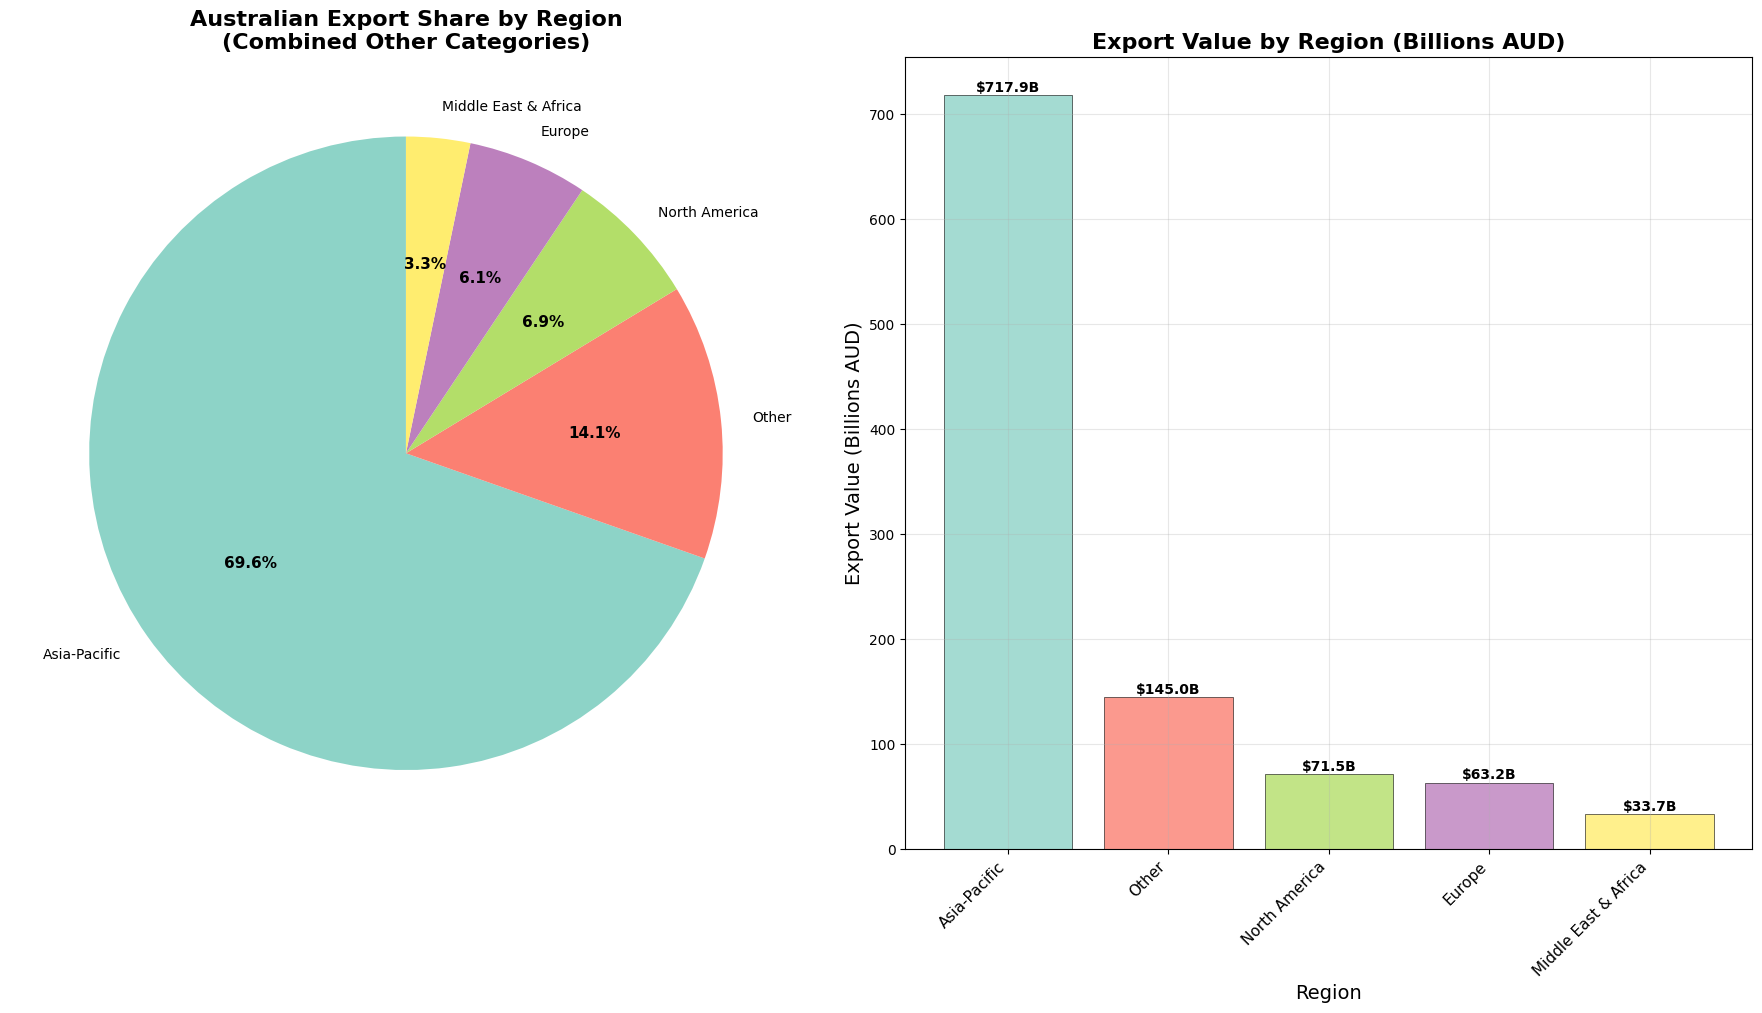


 KEY INSIGHTS:
Top Region: Asia-Pacific (69.6%)
Top 3 regions: 90.6% of exports
Total regions: 5


In [24]:

print("=== EXPORT SHARE BY REGION ANALYSIS ===")

import matplotlib.pyplot as plt
import numpy as np
from region_mapping import add_region_to_dataframe

# 1. APPLY REGIONAL MAPPING
# Add region column to existing dataframe
df = add_region_to_dataframe(df, 'country_of_destination', 'region')

# Check which countries are mapped to "Other"
other_countries = df[df['region'] == 'Other']['country_of_destination'].unique()
if len(other_countries) > 0:
    print(f"\nCountries mapped to 'Other' ({len(other_countries)} countries):")
    for country in sorted(other_countries)[:10]:  # Show first 10
        print(f"   • {country}")
    if len(other_countries) > 10:
        print(f"   ... and {len(other_countries) - 10} more")

# 2. REGIONAL EXPORT SHARE ANALYSIS
regional_analysis = df.groupby('region')['value_fob_aud'].sum().reset_index()
regional_analysis['value_billions'] = regional_analysis['value_fob_aud'] / 1e9
regional_analysis['market_share_pct'] = (regional_analysis['value_fob_aud'] / regional_analysis['value_fob_aud'].sum()) * 100

# Sort by market share
regional_analysis = regional_analysis.sort_values('market_share_pct', ascending=False)

# 3. COMBINE SMALL REGIONS WITH MAIN "OTHER" CATEGORY
small_regions = regional_analysis[regional_analysis['market_share_pct'] <= 1.0]
other_mask = regional_analysis['region'] == 'Other'

if other_mask.any() and len(small_regions) > 0:
    # Add small regions to the main "Other" category
    regional_analysis.loc[other_mask, 'market_share_pct'] += small_regions['market_share_pct'].sum()
    regional_analysis.loc[other_mask, 'value_fob_aud'] += small_regions['value_fob_aud'].sum()
    regional_analysis.loc[other_mask, 'value_billions'] = regional_analysis.loc[other_mask, 'value_fob_aud'] / 1e9
    
    # Remove small regions from the data
    regional_analysis = regional_analysis[~regional_analysis.index.isin(small_regions.index)]
    
    print(f"\nCombined {len(small_regions)} small regions with 'Other' category")
    print(f"Small regions combined: {', '.join(small_regions['region'].tolist())}")

# Re-sort after combining
regional_analysis = regional_analysis.sort_values('market_share_pct', ascending=False)

print(f"\nREGIONAL EXPORT SHARE:")
print("=" * 60)
for i, (_, region) in enumerate(regional_analysis.iterrows(), 1):
    print(f"{i}. {region['region']:<25} {region['market_share_pct']:>6.1f}% (${region['value_billions']:>6.1f}B)")

# 4. REGIONAL VISUALIZATIONS (MATPLOTLIB)
plt.style.use('default')
fig = plt.figure(figsize=(18, 10))

# 4.1 Regional Market Share Pie Chart (Combined Others)
ax1 = plt.subplot(1, 2, 1)
colors = plt.cm.Set3(np.linspace(0, 1, len(regional_analysis)))

wedges, texts, autotexts = ax1.pie(
    regional_analysis['market_share_pct'], 
    labels=regional_analysis['region'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)
ax1.set_title('Australian Export Share by Region\n(Combined Other Categories)', fontsize=16, fontweight='bold')
plt.setp(autotexts, size=11, weight='bold')

# 4.2 Regional Value Comparison Bar Chart
ax2 = plt.subplot(1, 2, 2)
bars = ax2.bar(range(len(regional_analysis)), regional_analysis['value_billions'], 
               color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
ax2.set_title('Export Value by Region (Billions AUD)', fontsize=16, fontweight='bold')
ax2.set_xlabel('Region', fontsize=14)
ax2.set_ylabel('Export Value (Billions AUD)', fontsize=14)
ax2.set_xticks(range(len(regional_analysis)))
ax2.set_xticklabels(regional_analysis['region'], rotation=45, ha='right', fontsize=11)
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, regional_analysis['value_billions'])):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'${value:.1f}B', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 5. STRATEGIC INSIGHTS
print(f"\n KEY INSIGHTS:")
print("=" * 40)

top_region = regional_analysis.iloc[0]
top_3_share = regional_analysis.head(3)['market_share_pct'].sum()

print(f"Top Region: {top_region['region']} ({top_region['market_share_pct']:.1f}%)")
print(f"Top 3 regions: {top_3_share:.1f}% of exports")
print(f"Total regions: {len(regional_analysis)}")


=== EXPORT SHARE BY REGION ANALYSIS ===



Countries mapped to 'Other' (7 countries):
   • Antarctica, nfd
   • Australia (Re-imports)
   • International Waters
   • No Country Details
   • Ship and Aircraft Stores
   • Unknown
   • Unknown Country

Combined 2 small regions with 'Other' category
Small regions combined: South America, Central America & Caribbean

REGIONAL EXPORT SHARE:
1. Asia-Pacific                69.6% ($ 717.9B)
2. Other                       14.1% ($ 145.0B)
3. North America                6.9% ($  71.5B)
4. Europe                       6.1% ($  63.2B)
5. Middle East & Africa         3.3% ($  33.7B)


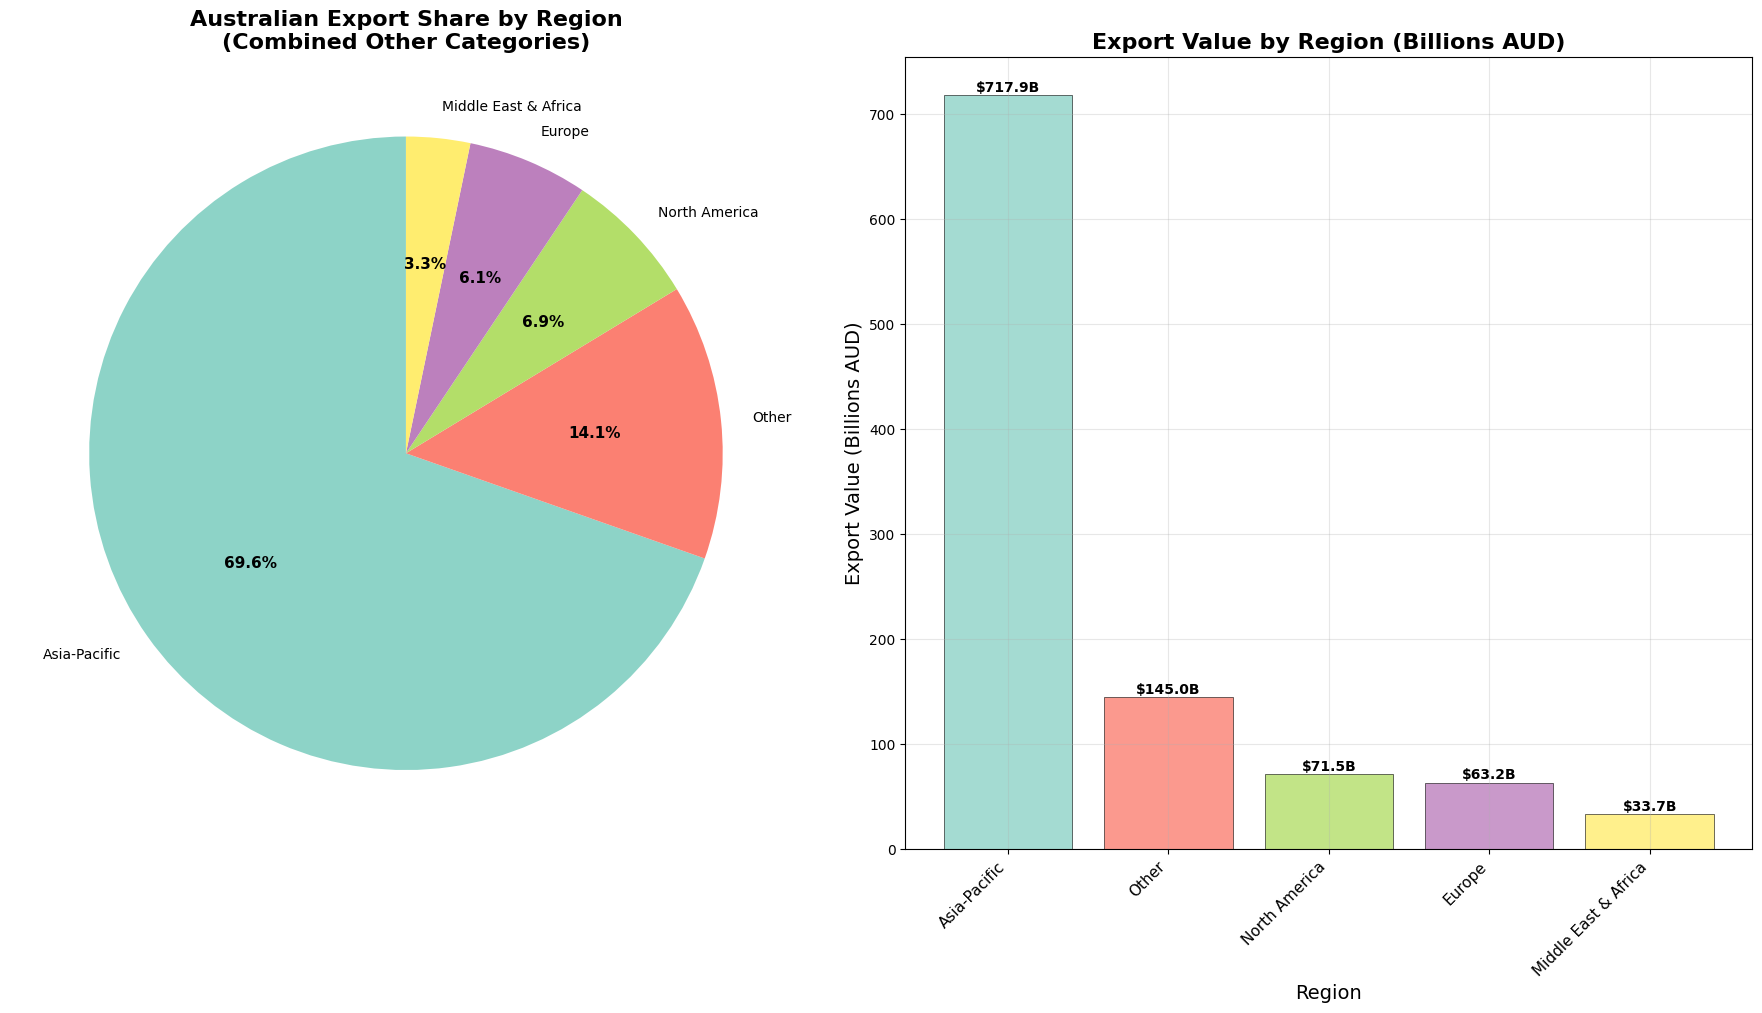


 KEY INSIGHTS:
Top Region: Asia-Pacific (69.6%)
Top 3 regions: 90.6% of exports
Total regions: 5


In [25]:
print("=== EXPORT SHARE BY REGION ANALYSIS ===")

import matplotlib.pyplot as plt
import numpy as np
from region_mapping import add_region_to_dataframe

# 1. APPLY REGIONAL MAPPING
# Add region column to existing dataframe
df = add_region_to_dataframe(df, 'country_of_destination', 'region')

# Check which countries are mapped to "Other"
other_countries = df[df['region'] == 'Other']['country_of_destination'].unique()
if len(other_countries) > 0:
    print(f"\nCountries mapped to 'Other' ({len(other_countries)} countries):")
    for country in sorted(other_countries)[:10]:  # Show first 10
        print(f"   • {country}")
    if len(other_countries) > 10:
        print(f"   ... and {len(other_countries) - 10} more")

# 2. REGIONAL EXPORT SHARE ANALYSIS
regional_analysis = df.groupby('region')['value_fob_aud'].sum().reset_index()
regional_analysis['value_billions'] = regional_analysis['value_fob_aud'] / 1e9
regional_analysis['market_share_pct'] = (regional_analysis['value_fob_aud'] / regional_analysis['value_fob_aud'].sum()) * 100

# Sort by market share
regional_analysis = regional_analysis.sort_values('market_share_pct', ascending=False)

# 3. COMBINE SMALL REGIONS WITH MAIN "OTHER" CATEGORY
small_regions = regional_analysis[regional_analysis['market_share_pct'] <= 1.0]
other_mask = regional_analysis['region'] == 'Other'

if other_mask.any() and len(small_regions) > 0:
    # Add small regions to the main "Other" category
    regional_analysis.loc[other_mask, 'market_share_pct'] += small_regions['market_share_pct'].sum()
    regional_analysis.loc[other_mask, 'value_fob_aud'] += small_regions['value_fob_aud'].sum()
    regional_analysis.loc[other_mask, 'value_billions'] = regional_analysis.loc[other_mask, 'value_fob_aud'] / 1e9
    
    # Remove small regions from the data
    regional_analysis = regional_analysis[~regional_analysis.index.isin(small_regions.index)]
    
    print(f"\nCombined {len(small_regions)} small regions with 'Other' category")
    print(f"Small regions combined: {', '.join(small_regions['region'].tolist())}")

# Re-sort after combining
regional_analysis = regional_analysis.sort_values('market_share_pct', ascending=False)

print(f"\nREGIONAL EXPORT SHARE:")
print("=" * 60)
for i, (_, region) in enumerate(regional_analysis.iterrows(), 1):
    print(f"{i}. {region['region']:<25} {region['market_share_pct']:>6.1f}% (${region['value_billions']:>6.1f}B)")

# 4. REGIONAL VISUALIZATIONS (MATPLOTLIB)
plt.style.use('default')
fig = plt.figure(figsize=(18, 10))

# 4.1 Regional Market Share Pie Chart (Combined Others)
ax1 = plt.subplot(1, 2, 1)
colors = plt.cm.Set3(np.linspace(0, 1, len(regional_analysis)))

wedges, texts, autotexts = ax1.pie(
    regional_analysis['market_share_pct'], 
    labels=regional_analysis['region'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)
ax1.set_title('Australian Export Share by Region\n(Combined Other Categories)', fontsize=16, fontweight='bold')
plt.setp(autotexts, size=11, weight='bold')

# 4.2 Regional Value Comparison Bar Chart
ax2 = plt.subplot(1, 2, 2)
bars = ax2.bar(range(len(regional_analysis)), regional_analysis['value_billions'], 
               color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
ax2.set_title('Export Value by Region (Billions AUD)', fontsize=16, fontweight='bold')
ax2.set_xlabel('Region', fontsize=14)
ax2.set_ylabel('Export Value (Billions AUD)', fontsize=14)
ax2.set_xticks(range(len(regional_analysis)))
ax2.set_xticklabels(regional_analysis['region'], rotation=45, ha='right', fontsize=11)
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, regional_analysis['value_billions'])):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'${value:.1f}B', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 5. STRATEGIC INSIGHTS
print(f"\n KEY INSIGHTS:")
print("=" * 40)

top_region = regional_analysis.iloc[0]
top_3_share = regional_analysis.head(3)['market_share_pct'].sum()

print(f"Top Region: {top_region['region']} ({top_region['market_share_pct']:.1f}%)")
print(f"Top 3 regions: {top_3_share:.1f}% of exports")
print(f"Total regions: {len(regional_analysis)}")



=== YEAR-OVER-YEAR GROWTH ANALYSIS (Q1 2024 vs Q1 2025) ===
Filtering data for Q1 (January-April) only...


Q1 2024 records: 281,682
Q1 2025 records: 284,713

Calculating YoY growth by destination country...
Countries analyzed: 50 (minimum $100M in Q1 2024)

🚀 TOP 10 FASTEST GROWING MARKETS (Q1 2024 → Q1 2025):
 1. South Africa                             📈  256.4% ($  +1.3B)
    Q1 2024: $0.5B → Q1 2025: $1.8B
 2. Belgium                                  📈  143.4% ($  +1.0B)
    Q1 2024: $0.7B → Q1 2025: $1.7B
 3. Mozambique                               📈  140.4% ($  +0.2B)
    Q1 2024: $0.2B → Q1 2025: $0.4B
 4. United Kingdom, Channel Islands and Isle 📈  135.0% ($  +1.7B)
    Q1 2024: $1.3B → Q1 2025: $2.9B
 5. United States of America                 📈  102.9% ($ +10.3B)
    Q1 2024: $10.0B → Q1 2025: $20.2B
 6. Pakistan                                 📈   67.4% ($  +0.2B)
    Q1 2024: $0.2B → Q1 2025: $0.4B
 7. Bahrain                                  📈   62.3% ($  +0.4B)
    Q1 2024: $0.6B → Q1 2025: $1.0B
 8. Canada                                   📈   47.7% ($  +0.4B)
    Q1 2024: 

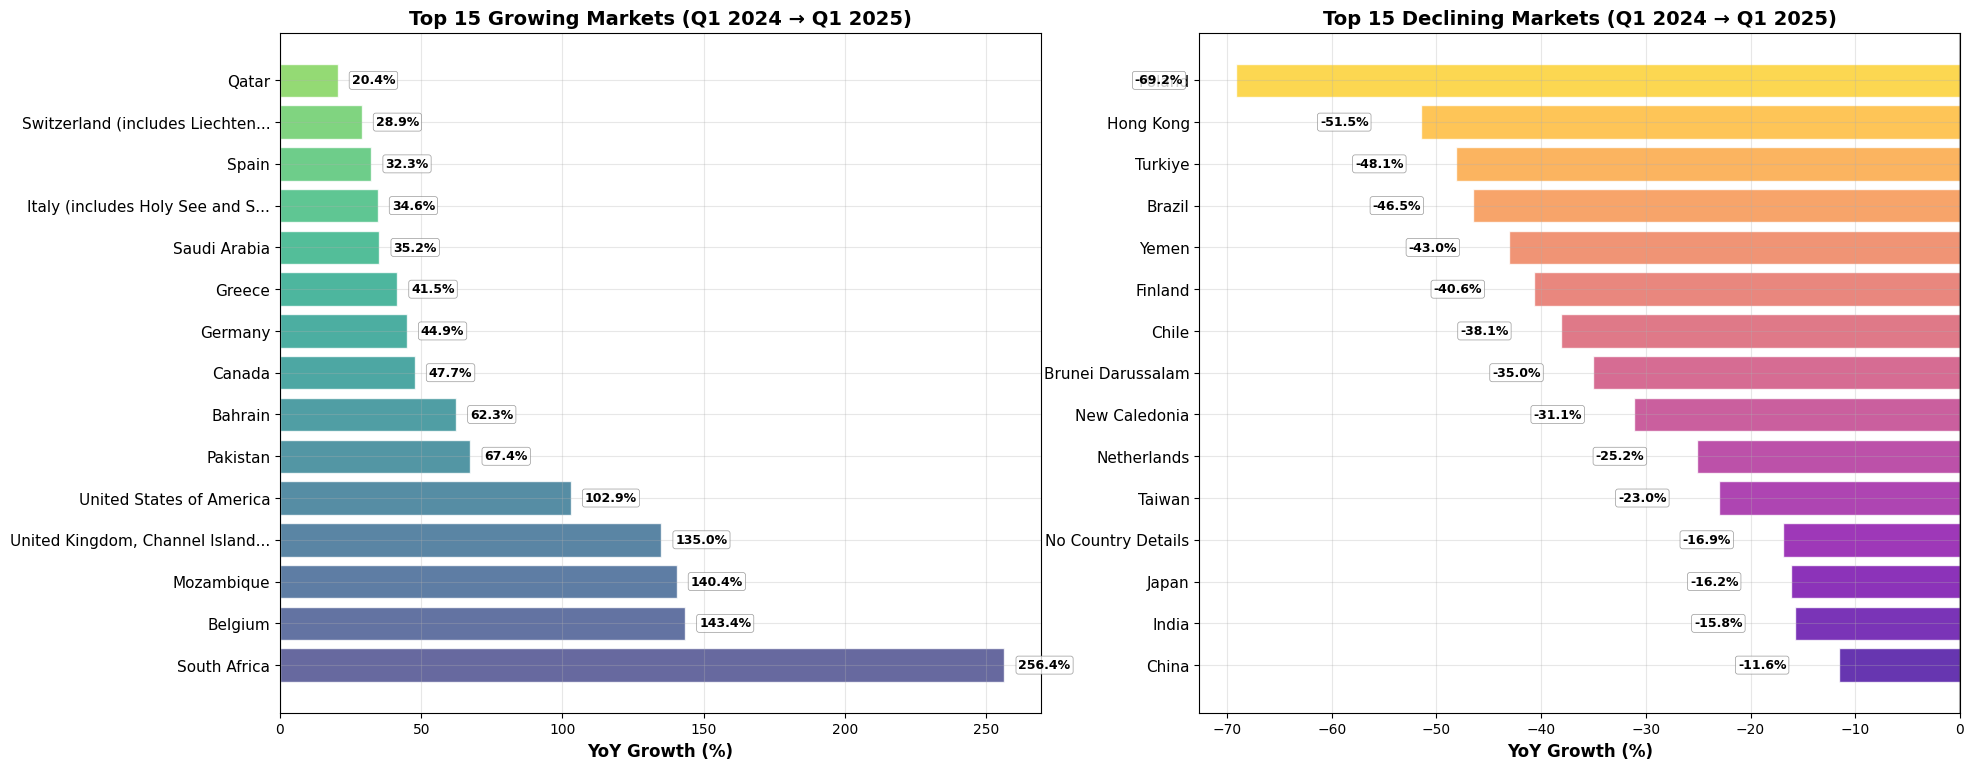


 KEY INSIGHTS:
Major Growth Opportunities (>20% growth, >$500M market):
   • South Africa: 256.4% growth ($0.5B → $1.8B)
   • Belgium: 143.4% growth ($0.7B → $1.7B)
   • United Kingdom, Channel Islands and Isle of Man, nfd: 135.0% growth ($1.3B → $2.9B)
   • United States of America: 102.9% growth ($10.0B → $20.2B)
   • Bahrain: 62.3% growth ($0.6B → $1.0B)

Major Concerns (>20% decline, >$500M market):
   • Taiwan: -23.0% decline ($6.5B → $5.0B)
   • Netherlands: -25.2% decline ($2.0B → $1.5B)
   • Brazil: -46.5% decline ($0.8B → $0.4B)
   • Hong Kong: -51.5% decline ($5.9B → $2.9B)

 YoY Growth Analysis completed!


In [26]:
# YEAR-OVER-YEAR (YOY) GROWTH ANALYSIS - Q1 2024 vs Q1 2025
print("=== YEAR-OVER-YEAR GROWTH ANALYSIS (Q1 2024 vs Q1 2025) ===")



# 1. FILTER DATA FOR Q1 (JANUARY-APRIL) ONLY
print("Filtering data for Q1 (January-April) only...")

# Filter for Q1 months (January, February, March, April)
q1_months = ['January', 'February', 'March', 'April']
df_q1 = df[df['month'].isin(q1_months)].copy()

print(f"Q1 2024 records: {len(df_q1[df_q1['year'] == 2024]):,}")
print(f"Q1 2025 records: {len(df_q1[df_q1['year'] == 2025]):,}")

# 2. CALCULATE YOY GROWTH BY COUNTRY
print("\nCalculating YoY growth by destination country...")

# Calculate export values by country and year for Q1 only
country_yearly = df_q1.groupby(['country_of_destination', 'year'])['value_fob_aud'].sum().unstack(fill_value=0)

# Calculate YoY growth
if 2024 in country_yearly.columns and 2025 in country_yearly.columns:
    country_yearly['YoY_Growth_%'] = ((country_yearly[2025] - country_yearly[2024]) / country_yearly[2024] * 100).round(2)
    country_yearly['YoY_Growth_Absolute'] = (country_yearly[2025] - country_yearly[2024]) / 1e9  # in billions
    country_yearly['Q1_2024_Value'] = country_yearly[2024] / 1e9  # in billions
    country_yearly['Q1_2025_Value'] = country_yearly[2025] / 1e9  # in billions
    
    # Filter countries with significant trade volume (at least $100M in Q1 2024)
    significant_countries = country_yearly[country_yearly[2024] >= 1e8].copy()  # $100M threshold
    
    # Sort by YoY growth
    significant_countries = significant_countries.sort_values('YoY_Growth_%', ascending=False)
    
    print(f"Countries analyzed: {len(significant_countries)} (minimum $100M in Q1 2024)")
    
    # 3. TOP GROWING MARKETS
    print(f"\n🚀 TOP 10 FASTEST GROWING MARKETS (Q1 2024 → Q1 2025):")
    print("=" * 80)
    for i, (country, row) in enumerate(significant_countries.head(10).iterrows(), 1):
        growth_pct = row['YoY_Growth_%']
        growth_abs = row['YoY_Growth_Absolute']
        value_2024 = row['Q1_2024_Value']
        value_2025 = row['Q1_2025_Value']
        
        if growth_pct > 0:
            emoji = "📈"
        else:
            emoji = "📉"
            
        print(f"{i:2d}. {country[:40]:<40} {emoji} {growth_pct:>6.1f}% (${growth_abs:>+6.1f}B)")
        print(f"    Q1 2024: ${value_2024:.1f}B → Q1 2025: ${value_2025:.1f}B")
    
    # 4. TOP DECLINING MARKETS
    print(f"\nTOP 10 DECLINING MARKETS (Q1 2024 → Q1 2025):")
    print("=" * 80)
    declining_countries = significant_countries.tail(10).sort_values('YoY_Growth_%', ascending=True)
    for i, (country, row) in enumerate(declining_countries.iterrows(), 1):
        growth_pct = row['YoY_Growth_%']
        growth_abs = row['YoY_Growth_Absolute']
        value_2024 = row['Q1_2024_Value']
        value_2025 = row['Q1_2025_Value']
        
        print(f"{i:2d}. {country[:40]:<40}  {growth_pct:>6.1f}% (${growth_abs:>+6.1f}B)")
        print(f"    Q1 2024: ${value_2024:.1f}B → Q1 2025: ${value_2025:.1f}B")
    
    # 5. GROWTH SUMMARY STATISTICS
    avg_growth = significant_countries['YoY_Growth_%'].mean()
    positive_growth = (significant_countries['YoY_Growth_%'] > 0).sum()
    total_countries = len(significant_countries)
    
    print(f"\n GROWTH SUMMARY (Q1 2024 → Q1 2025):")
    print("=" * 50)
    print(f" Average YoY Growth: {avg_growth:.1f}%")
    print(f" Countries with Positive Growth: {positive_growth}/{total_countries} ({positive_growth/total_countries*100:.1f}%)")
    print(f" Countries with Negative Growth: {total_countries-positive_growth}/{total_countries} ({(total_countries-positive_growth)/total_countries*100:.1f}%)")
    
    # 6. VISUALIZATIONS
    plt.style.use('default')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))
    
    # 6.1 Top 15 Growing Markets with Cool Colors
    top_growing = significant_countries.head(15)
    # Use a cool gradient from electric blue to neon green
    growing_colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(top_growing)))
    
    bars1 = ax1.barh(range(len(top_growing)), top_growing['YoY_Growth_%'], color=growing_colors, alpha=0.8, edgecolor='white', linewidth=1)
    ax1.set_yticks(range(len(top_growing)))
    ax1.set_yticklabels([country[:30] + '...' if len(country) > 30 else country for country in top_growing.index], fontsize=11)
    ax1.set_xlabel('YoY Growth (%)', fontsize=12, fontweight='bold')
    ax1.set_title('Top 15 Growing Markets (Q1 2024 → Q1 2025)', fontsize=14, fontweight='bold')
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    ax1.grid(True, alpha=0.3)
    
    # Add value labels with better positioning
    for i, (bar, value) in enumerate(zip(bars1, top_growing['YoY_Growth_%'])):
        # Position labels further from the bars to avoid truncation
        x_pos = value + (5 if value > 0 else -5)  # Increased offset
        ax1.text(x_pos, bar.get_y() + bar.get_height()/2, 
                f'{value:.1f}%', ha='left' if value > 0 else 'right', va='center', 
                fontsize=9, fontweight='bold', bbox=dict(boxstyle='round,pad=0.2', 
                facecolor='white', alpha=0.8, edgecolor='gray', linewidth=0.5))
    
    # 6.2 Top 15 Declining Markets with Cool Colors
    top_declining = significant_countries.tail(15)
    
    # Debug: Print the actual country names to see what we're working with
    print("\nDEBUG - Top 15 Declining Markets:")
    for i, country in enumerate(top_declining.index):
        print(f"{i+1}. '{country}' (length: {len(country)})")
    # Use a cool gradient from deep purple to hot pink
    declining_colors = plt.cm.plasma(np.linspace(0.1, 0.9, len(top_declining)))
    
    bars2 = ax2.barh(range(len(top_declining)), top_declining['YoY_Growth_%'], color=declining_colors, alpha=0.8, edgecolor='white', linewidth=1)
    ax2.set_yticks(range(len(top_declining)))
    ax2.set_yticklabels([country[:30] + '...' if len(country) > 30 else country for country in top_declining.index], fontsize=11)
    ax2.set_xlabel('YoY Growth (%)', fontsize=12, fontweight='bold')
    ax2.set_title('Top 15 Declining Markets (Q1 2024 → Q1 2025)', fontsize=14, fontweight='bold')
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    ax2.grid(True, alpha=0.3)
    
    # Add value labels with better positioning
    for i, (bar, value) in enumerate(zip(bars2, top_declining['YoY_Growth_%'])):
        # Position labels further from the bars to avoid truncation
        x_pos = value + (-5 if value < 0 else 5)  # Increased offset
        ax2.text(x_pos, bar.get_y() + bar.get_height()/2, 
                f'{value:.1f}%', ha='right' if value < 0 else 'left', va='center', 
                fontsize=9, fontweight='bold', bbox=dict(boxstyle='round,pad=0.2', 
                facecolor='white', alpha=0.8, edgecolor='gray', linewidth=0.5))
    
    # Adjust layout to ensure all country names are visible
    plt.tight_layout()
    plt.subplots_adjust(left=0.25, right=0.95, top=0.95, bottom=0.1)  # More space on left for country names
    plt.show()
    
    # 7. KEY INSIGHTS
    print(f"\n KEY INSIGHTS:")
    print("=" * 40)
    
    # Find biggest growth opportunities
    big_growers = significant_countries[
        (significant_countries['YoY_Growth_%'] > 20) & 
        (significant_countries['Q1_2024_Value'] > 0.5)  # >$500M in 2024
    ].head(5)
    
    if len(big_growers) > 0:
        print(f"Major Growth Opportunities (>20% growth, >$500M market):")
        for country, row in big_growers.iterrows():
            print(f"   • {country}: {row['YoY_Growth_%']:.1f}% growth (${row['Q1_2024_Value']:.1f}B → ${row['Q1_2025_Value']:.1f}B)")
    
    # Find biggest concerns
    big_decliners = significant_countries[
        (significant_countries['YoY_Growth_%'] < -20) & 
        (significant_countries['Q1_2024_Value'] > 0.5)  # >$500M in 2024
    ].head(5)
    
    if len(big_decliners) > 0:
        print(f"\nMajor Concerns (>20% decline, >$500M market):")
        for country, row in big_decliners.iterrows():
            print(f"   • {country}: {row['YoY_Growth_%']:.1f}% decline (${row['Q1_2024_Value']:.1f}B → ${row['Q1_2025_Value']:.1f}B)")
    
    print(f"\n YoY Growth Analysis completed!")
    
else:
    print(" Cannot calculate YoY growth - missing 2024 or 2025 data")
    print(f"Available years: {sorted(df_q1['year'].unique())}")

=== COMPACT 8-MONTH FORECASTING ===



=== 8-MONTH PORT FORECASTS ===

Forecasting: Conf Aust Ports


12:47:48 - cmdstanpy - INFO - Chain [1] start processing


12:47:58 - cmdstanpy - INFO - Chain [1] done processing


12:47:59 - cmdstanpy - INFO - Chain [1] start processing


   Current: $7.0B
   8-Month Forecast: $-4.8B
   Growth: -169.2%

Forecasting: Port Hedland


12:48:22 - cmdstanpy - INFO - Chain [1] done processing


   Current: $5.6B
   8-Month Forecast: $5.7B
   Growth: 2.3%

Forecasting: Sydney


12:48:22 - cmdstanpy - INFO - Chain [1] start processing


12:48:46 - cmdstanpy - INFO - Chain [1] done processing


   Current: $5.4B
   8-Month Forecast: $4.2B
   Growth: -21.5%


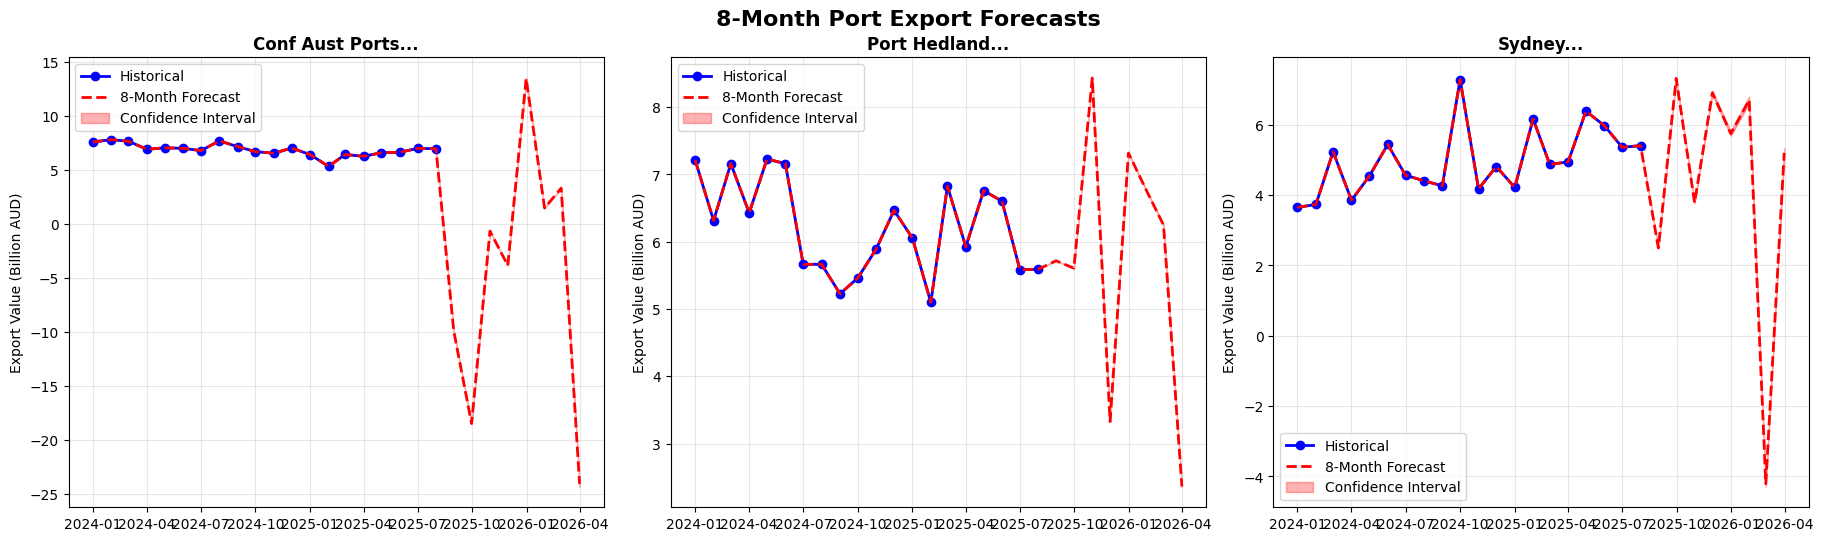


=== 8-MONTH COMMODITY FORECASTS ===


12:48:48 - cmdstanpy - INFO - Chain [1] start processing



Forecasting: Iron ore and concentrates, not agglomerated...


12:48:59 - cmdstanpy - INFO - Chain [1] done processing


12:48:59 - cmdstanpy - INFO - Chain [1] start processing


   Current: $9.6B
   8-Month Forecast: $-4.2B
   Growth: -143.8%

Forecasting: Special transactions and commodities not classifie...


12:49:15 - cmdstanpy - INFO - Chain [1] done processing


12:49:15 - cmdstanpy - INFO - Chain [1] start processing


   Current: $7.0B
   8-Month Forecast: $6.3B
   Growth: -11.0%

Forecasting: Bituminous coal, whether or not pulverized, not ag...


12:49:23 - cmdstanpy - INFO - Chain [1] done processing


   Current: $5.4B
   8-Month Forecast: $11.0B
   Growth: 103.3%


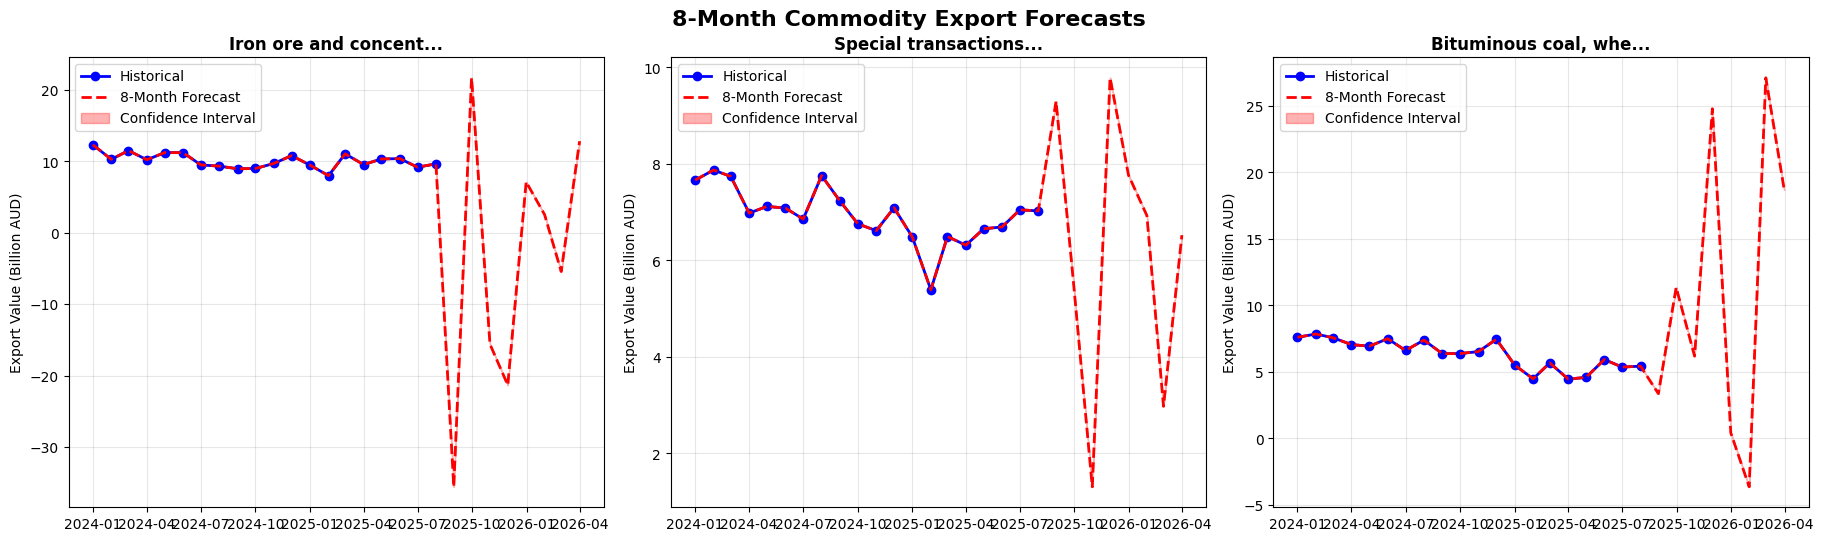


✅ Compact 8-month forecasting completed!


In [27]:
# COMPACT 8-MONTH FORECASTING WITH PROPHET - FIXED LAYOUT
print("=== COMPACT 8-MONTH FORECASTING ===")

# Install Prophet if needed
try:
    from prophet import Prophet
except ImportError:
    import subprocess
    subprocess.check_call(["pip", "install", "prophet"])
    from prophet import Prophet

import matplotlib.pyplot as plt
import pandas as pd

# Create date column
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month_number'].astype(str).str.zfill(2) + '-01')

# Function to create tuned Prophet model
def create_tuned_model(is_commodity=False):
    model = Prophet(
        changepoint_prior_scale=0.03 if is_commodity else 0.05,
        seasonality_prior_scale=15.0 if is_commodity else 10.0,
        seasonality_mode='multiplicative',
        yearly_seasonality=True,
        holidays_prior_scale=15.0 if is_commodity else 10.0
    )
    
    # Add seasonalities
    model.add_seasonality(name='quarterly', period=91.25, fourier_order=6 if is_commodity else 4)
    model.add_seasonality(name='monthly', period=30.5, fourier_order=3 if is_commodity else 2)
    
    # Add holidays
    holidays_data = []
    for holiday, dates in [('Christmas', ['2024-12-25', '2025-12-25']),
                          ('Chinese New Year', ['2024-02-10', '2025-01-29']),
                          ('Easter', ['2024-03-31', '2025-04-20']),
                          ('Thanksgiving', ['2024-11-28', '2025-11-27'])]:
        for date in dates:
            holidays_data.append({
                'holiday': holiday, 'ds': date,
                'lower_window': -3 if is_commodity else -2,
                'upper_window': 3 if is_commodity else 2
            })
    
    model.holidays = pd.DataFrame(holidays_data)
    model.holidays['ds'] = pd.to_datetime(model.holidays['ds'])
    return model

# Function to forecast and plot
def forecast_and_plot(data, title, ax, is_commodity=False):
    if len(data) < 12:
        print(f"   Not enough data ({len(data)} months)")
        return
    
    # Create and fit model
    model = create_tuned_model(is_commodity)
    model.fit(data)
    
    # Make 8-month forecast
    future = model.make_future_dataframe(periods=8, freq='M')
    forecast = model.predict(future)
    
    # Plot
    ax.plot(data['ds'], data['y'] / 1e9, 'b-', label='Historical', linewidth=2, marker='o')
    ax.plot(forecast['ds'], forecast['yhat'] / 1e9, 'r--', label='8-Month Forecast', linewidth=2)
    ax.fill_between(forecast['ds'], forecast['yhat_lower'] / 1e9, forecast['yhat_upper'] / 1e9,
                   alpha=0.3, color='red', label='Confidence Interval')
    
    # Formatting
    ax.set_title(f'{title[:20]}...', fontsize=12, fontweight='bold')
    ax.set_ylabel('Export Value (Billion AUD)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Results
    current = data['y'].iloc[-1] / 1e9
    predicted = forecast['yhat'].tail(8).mean() / 1e9
    growth = ((predicted - current) / current) * 100
    
    print(f"   Current: ${current:.1f}B")
    print(f"   8-Month Forecast: ${predicted:.1f}B")
    print(f"   Growth: {growth:.1f}%")

# 1. PORT FORECASTS
print("\n=== 8-MONTH PORT FORECASTS ===")
top_ports = df.groupby('port_of_loading')['value_fob_aud'].sum().nlargest(3).index

fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # Increased width
fig.suptitle('8-Month Port Export Forecasts', fontsize=16, fontweight='bold')

for i, port in enumerate(top_ports):
    print(f"\nForecasting: {port}")
    port_data = df[df['port_of_loading'] == port].groupby('date')['value_fob_aud'].sum().reset_index()
    port_data.columns = ['ds', 'y']
    forecast_and_plot(port_data, port, axes[i], is_commodity=False)

# FIXED: Better layout to prevent x-axis truncation
plt.tight_layout()
plt.subplots_adjust(bottom=0.15, left=0.08, right=0.95, top=0.9)  # More space for x-axis labels
plt.show()

# 2. COMMODITY FORECASTS
print("\n=== 8-MONTH COMMODITY FORECASTS ===")
top_commodities = df.groupby('product_description')['value_fob_aud'].sum().nlargest(3).index

fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # Increased width
fig.suptitle('8-Month Commodity Export Forecasts', fontsize=16, fontweight='bold')

for i, commodity in enumerate(top_commodities):
    print(f"\nForecasting: {commodity[:50]}...")
    commodity_data = df[df['product_description'] == commodity].groupby('date')['value_fob_aud'].sum().reset_index()
    commodity_data.columns = ['ds', 'y']
    forecast_and_plot(commodity_data, commodity, axes[i], is_commodity=True)

# FIXED: Better layout to prevent x-axis truncation
plt.tight_layout()
plt.subplots_adjust(bottom=0.15, left=0.08, right=0.95, top=0.9)  # More space for x-axis labels
plt.show()

print("\n✅ Compact 8-month forecasting completed!")

=== COMPACT 8-MONTH FORECASTING ===



=== 8-MONTH PORT FORECASTS ===

Forecasting: Conf Aust Ports


12:49:25 - cmdstanpy - INFO - Chain [1] start processing


12:49:31 - cmdstanpy - INFO - Chain [1] done processing


   Current: $7.0B
   8-Month Forecast: $9.8B
   Growth: 40.9%


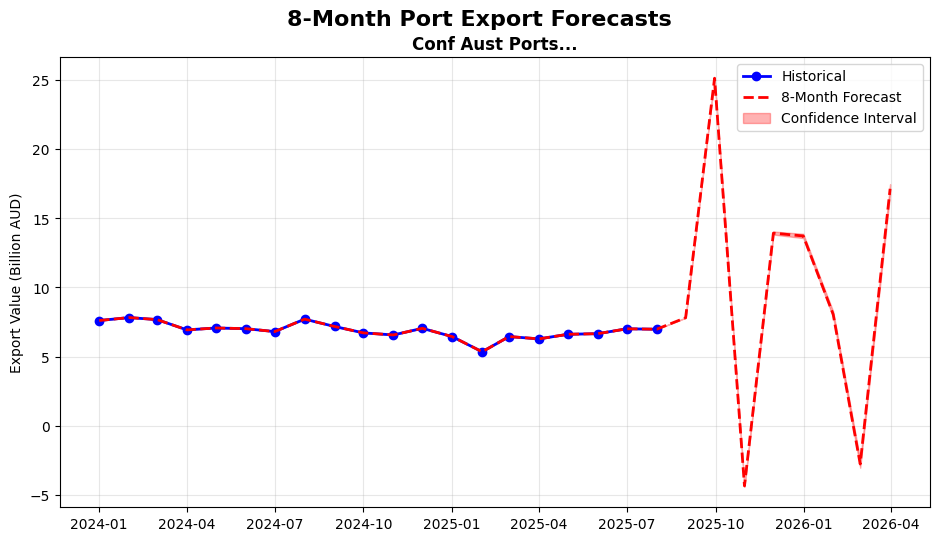


=== 8-MONTH COMMODITY FORECASTS ===


12:49:31 - cmdstanpy - INFO - Chain [1] start processing



Forecasting: Iron ore and concentrates, not agglomerated...


12:49:34 - cmdstanpy - INFO - Chain [1] done processing


   Current: $9.6B
   8-Month Forecast: $8.9B
   Growth: -7.4%


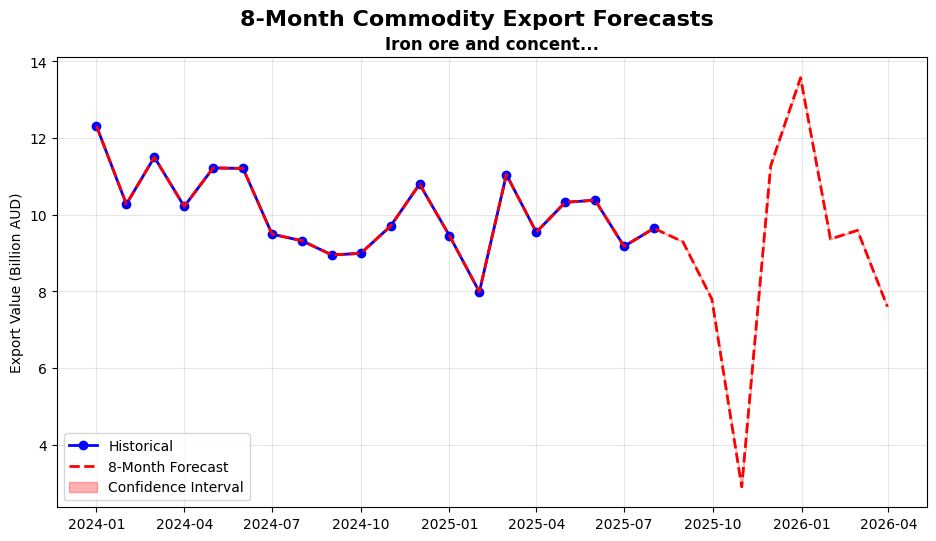


 Compact 8-month forecasting completed!


In [28]:
print("=== COMPACT 8-MONTH FORECASTING ===")

# Install Prophet if needed
try:
    from prophet import Prophet
except ImportError:
    import subprocess
    subprocess.check_call(["pip", "install", "prophet"])
    from prophet import Prophet

import matplotlib.pyplot as plt
import pandas as pd

# Create date column
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month_number'].astype(str).str.zfill(2) + '-01')

# Function to create tuned Prophet model
def create_tuned_model(is_commodity=False):
    model = Prophet(
        changepoint_prior_scale=0.03 if is_commodity else 0.03,
        seasonality_prior_scale=5.0 if is_commodity else 5.0,
        seasonality_mode='additive',
        yearly_seasonality=True,
        holidays_prior_scale=5.0 if is_commodity else 5.0
    )
    
    # Add seasonalities
    model.add_seasonality(name='quarterly', period=91.25, fourier_order=2 if is_commodity else 2)
    model.add_seasonality(name='monthly', period=30.5, fourier_order=1 if is_commodity else 1)
    
    # Add holidays
    holidays_data = []
    for holiday, dates in [('Christmas', ['2024-12-25', '2025-12-25']),
                          ('Chinese New Year', ['2024-02-10', '2025-01-29']),
                          ('Easter', ['2024-03-31', '2025-04-20']),
                          ('Thanksgiving', ['2024-11-28', '2025-11-27'])]:
        for date in dates:
            holidays_data.append({
                'holiday': holiday, 'ds': date,
                'lower_window': -3 if is_commodity else -2,
                'upper_window': 3 if is_commodity else 2
            })
    
    model.holidays = pd.DataFrame(holidays_data)
    model.holidays['ds'] = pd.to_datetime(model.holidays['ds'])
    return model

# Function to forecast and plot
def forecast_and_plot(data, title, ax, is_commodity=False):
    if len(data) < 12:
        print(f"Not enough data ({len(data)} months)")
        return
    
    # Create and fit model
    model = create_tuned_model(is_commodity)
    model.fit(data)
    
    # Make 8-month forecast
    future = model.make_future_dataframe(periods=8, freq='M')
    forecast = model.predict(future)
    
    # Plot
    ax.plot(data['ds'], data['y'] / 1e9, 'b-', label='Historical', linewidth=2, marker='o')
    ax.plot(forecast['ds'], forecast['yhat'] / 1e9, 'r--', label='8-Month Forecast', linewidth=2)
    ax.fill_between(forecast['ds'], forecast['yhat_lower'] / 1e9, forecast['yhat_upper'] / 1e9,
                   alpha=0.3, color='red', label='Confidence Interval')
    
    # Formatting
    ax.set_title(f'{title[:20]}...', fontsize=12, fontweight='bold')
    ax.set_ylabel('Export Value (Billion AUD)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Results
    current = data['y'].iloc[-1] / 1e9
    predicted = forecast['yhat'].tail(8).mean() / 1e9
    growth = ((predicted - current) / current) * 100
    
    print(f"   Current: ${current:.1f}B")
    print(f"   8-Month Forecast: ${predicted:.1f}B")
    print(f"   Growth: {growth:.1f}%")

# 1. PORT FORECASTS
print("\n=== 8-MONTH PORT FORECASTS ===")
top_ports = df.groupby('port_of_loading')['value_fob_aud'].sum().nlargest(1).index

fig, ax = plt.subplots(1, 1, figsize=(10, 6))  # Single chart
fig.suptitle('8-Month Port Export Forecasts', fontsize=16, fontweight='bold')

for port in top_ports:
    print(f"\nForecasting: {port}")
    port_data = df[df['port_of_loading'] == port].groupby('date')['value_fob_aud'].sum().reset_index()
    port_data.columns = ['ds', 'y']
    forecast_and_plot(port_data, port, ax, is_commodity=False)

# FIXED: Better layout to prevent x-axis truncation
plt.tight_layout()
plt.subplots_adjust(bottom=0.15, left=0.08, right=0.95, top=0.9)  # More space for x-axis labels
plt.show()

# 2. COMMODITY FORECASTS
print("\n=== 8-MONTH COMMODITY FORECASTS ===")
top_commodities = df.groupby('product_description')['value_fob_aud'].sum().nlargest(1).index

fig, ax = plt.subplots(1, 1, figsize=(10, 6))  # Single chart
fig.suptitle('8-Month Commodity Export Forecasts', fontsize=16, fontweight='bold')

for commodity in top_commodities:
    print(f"\nForecasting: {commodity[:50]}...")
    commodity_data = df[df['product_description'] == commodity].groupby('date')['value_fob_aud'].sum().reset_index()
    commodity_data.columns = ['ds', 'y']
    forecast_and_plot(commodity_data, commodity, ax, is_commodity=True)

# FIXED: Better layout to prevent x-axis truncation
plt.tight_layout()
plt.subplots_adjust(bottom=0.15, left=0.08, right=0.95, top=0.9)  # More space for x-axis labels
plt.show()

print("\n Compact 8-month forecasting completed!")

=== STABLE 8-MONTH FORECASTING ===



=== STABLE 8-MONTH PORT FORECASTS ===

Stable forecasting: Conf Aust Ports


12:49:36 - cmdstanpy - INFO - Chain [1] start processing


12:49:37 - cmdstanpy - INFO - Chain [1] done processing


   Current: $7.0B
   8-Month Forecast: $5.6B
   Growth: -20.2%


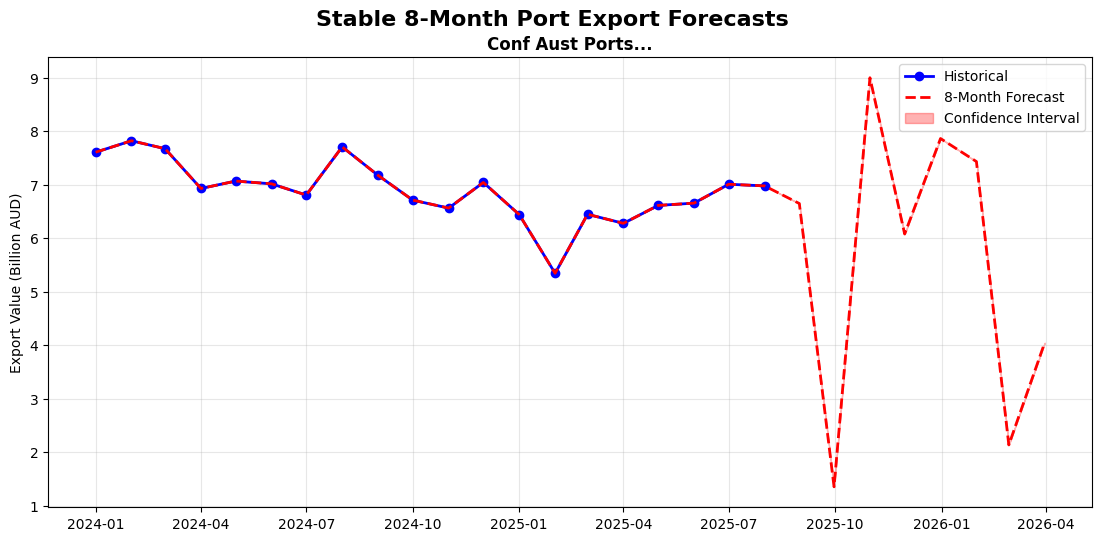


=== STABLE 8-MONTH COMMODITY FORECASTS ===


12:49:37 - cmdstanpy - INFO - Chain [1] start processing



Stable forecasting: Iron ore and concentrates, not agglomerated...


12:49:40 - cmdstanpy - INFO - Chain [1] done processing


   Current: $9.6B
   8-Month Forecast: $8.5B
   Growth: -12.0%


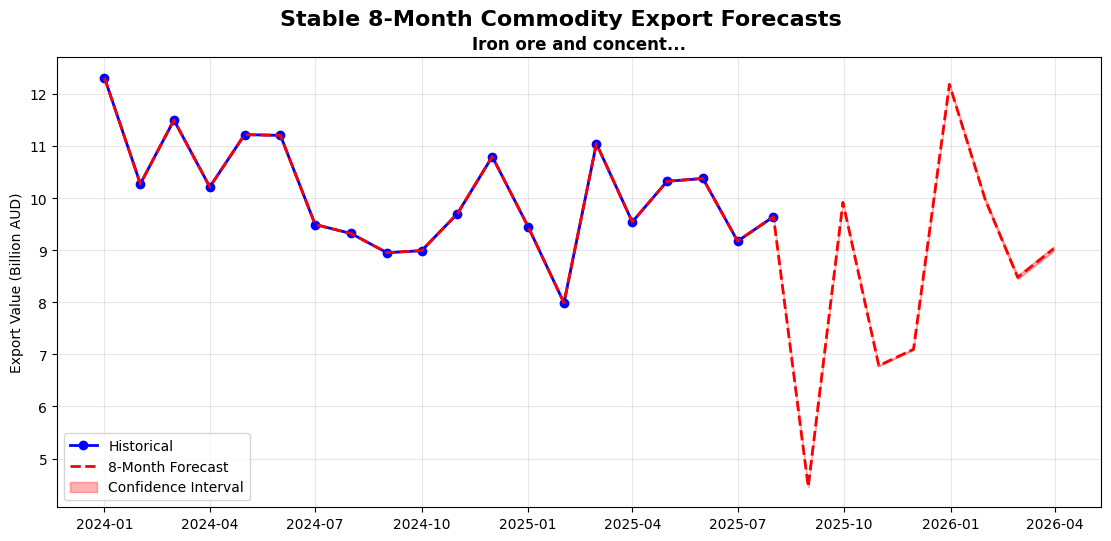


✅ Stable forecasting completed!

=== STABLE MODEL EXPLANATION ===
• Simplified settings to avoid overfitting
• Lower seasonality complexity
• More rigid trend to prevent extreme swings
• Should produce realistic, business-usable forecasts


In [29]:
print("=== STABLE 8-MONTH FORECASTING ===")

# Install Prophet if needed
try:
    from prophet import Prophet
except ImportError:
    import subprocess
    subprocess.check_call(["pip", "install", "prophet"])
    from prophet import Prophet

import matplotlib.pyplot as plt
import pandas as pd

# Create date column
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month_number'].astype(str).str.zfill(2) + '-01')

# Function to create STABLE Prophet model (simplified to avoid overfitting)
def create_stable_model():
    model = Prophet(
        # SIMPLIFIED SETTINGS TO AVOID OVERFITTING
        changepoint_prior_scale=0.01,      # More rigid trend (less flexible)
        seasonality_prior_scale=2.0,       # Lower seasonality trust
        seasonality_mode='additive',        # Additive instead of multiplicative
        yearly_seasonality=True,           # Keep yearly seasonality
        weekly_seasonality=False,          # No weekly patterns
        daily_seasonality=False,           # No daily patterns
        holidays_prior_scale=2.0           # Lower holiday effects
    )
    
    # SIMPLIFIED SEASONALITIES (lower complexity)
    model.add_seasonality(name='quarterly', period=91.25, fourier_order=2)  # Lower complexity
    # Remove monthly seasonality to reduce overfitting
    
    return model

# Function to forecast and plot
def forecast_and_plot_stable(data, title, ax):
    if len(data) < 12:
        print(f"   Not enough data ({len(data)} months)")
        return
    
    # Create and fit STABLE model
    model = create_stable_model()
    model.fit(data)
    
    # Make 8-month forecast
    future = model.make_future_dataframe(periods=8, freq='M')
    forecast = model.predict(future)
    
    # Plot
    ax.plot(data['ds'], data['y'] / 1e9, 'b-', label='Historical', linewidth=2, marker='o')
    ax.plot(forecast['ds'], forecast['yhat'] / 1e9, 'r--', label='8-Month Forecast', linewidth=2)
    ax.fill_between(forecast['ds'], forecast['yhat_lower'] / 1e9, forecast['yhat_upper'] / 1e9,
                   alpha=0.3, color='red', label='Confidence Interval')
    
    # Formatting
    ax.set_title(f'{title[:20]}...', fontsize=12, fontweight='bold')
    ax.set_ylabel('Export Value (Billion AUD)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Results
    current = data['y'].iloc[-1] / 1e9
    predicted = forecast['yhat'].tail(8).mean() / 1e9
    growth = ((predicted - current) / current) * 100
    
    print(f"   Current: ${current:.1f}B")
    print(f"   8-Month Forecast: ${predicted:.1f}B")
    print(f"   Growth: {growth:.1f}%")

# 1. PORT FORECASTS
print("\n=== STABLE 8-MONTH PORT FORECASTS ===")
top_ports = df.groupby('port_of_loading')['value_fob_aud'].sum().nlargest(1).index

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle('Stable 8-Month Port Export Forecasts', fontsize=16, fontweight='bold')

for port in top_ports:
    print(f"\nStable forecasting: {port}")
    port_data = df[df['port_of_loading'] == port].groupby('date')['value_fob_aud'].sum().reset_index()
    port_data.columns = ['ds', 'y']
    forecast_and_plot_stable(port_data, port, ax)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15, left=0.08, right=0.95, top=0.9)
plt.show()

# 2. COMMODITY FORECASTS
print("\n=== STABLE 8-MONTH COMMODITY FORECASTS ===")
top_commodities = df.groupby('product_description')['value_fob_aud'].sum().nlargest(1).index

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle('Stable 8-Month Commodity Export Forecasts', fontsize=16, fontweight='bold')

for commodity in top_commodities:
    print(f"\nStable forecasting: {commodity[:50]}...")
    commodity_data = df[df['product_description'] == commodity].groupby('date')['value_fob_aud'].sum().reset_index()
    commodity_data.columns = ['ds', 'y']
    forecast_and_plot_stable(commodity_data, commodity, ax)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15, left=0.08, right=0.95, top=0.9)
plt.show()

print("\n✅ Stable forecasting completed!")
print("\n=== STABLE MODEL EXPLANATION ===")
print("• Simplified settings to avoid overfitting")
print("• Lower seasonality complexity")
print("• More rigid trend to prevent extreme swings")
print("• Should produce realistic, business-usable forecasts")

=== ULTRA-SIMPLE 8-MONTH FORECASTING ===


12:49:41 - cmdstanpy - INFO - Chain [1] start processing



=== ULTRA-SIMPLE 8-MONTH PORT FORECASTS ===

Ultra-simple forecasting: Conf Aust Ports


12:49:41 - cmdstanpy - INFO - Chain [1] done processing


   Current: $7.0B
   8-Month Forecast: $5.8B
   Growth: -17.2%


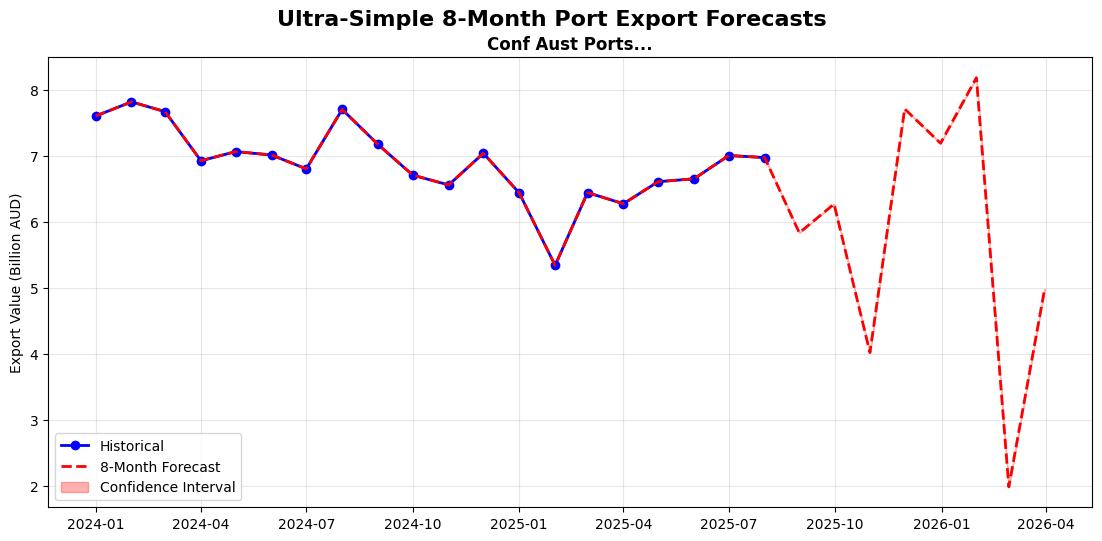


=== ULTRA-SIMPLE 8-MONTH COMMODITY FORECASTS ===


12:49:42 - cmdstanpy - INFO - Chain [1] start processing



Ultra-simple forecasting: Iron ore and concentrates, not agglomerated...


12:49:42 - cmdstanpy - INFO - Chain [1] done processing


   Current: $9.6B
   8-Month Forecast: $8.7B
   Growth: -9.5%


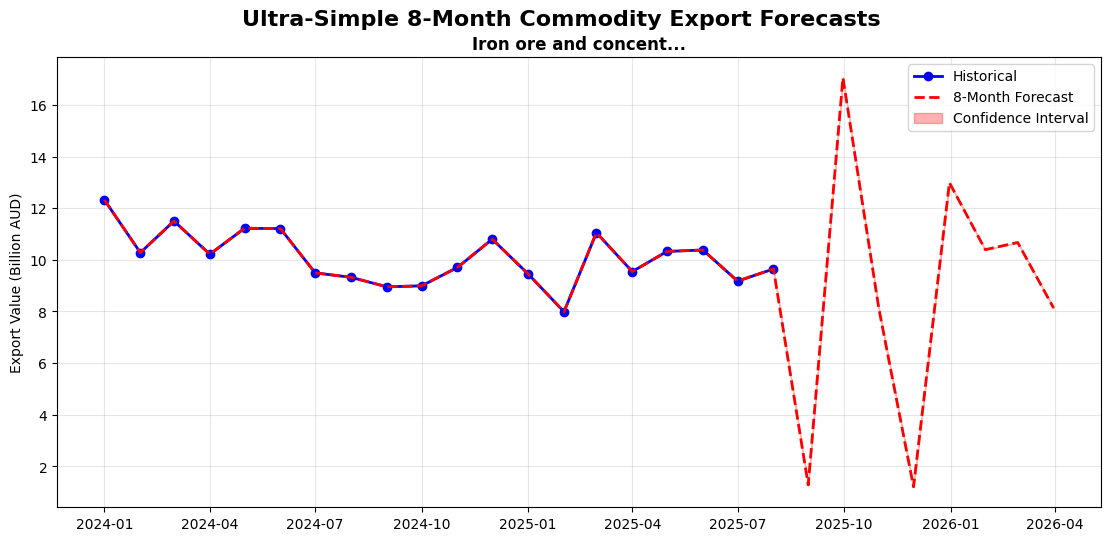


✅ Ultra-simple forecasting completed!

=== ULTRA-SIMPLE MODEL EXPLANATION ===
• Minimal complexity to avoid overfitting
• Very rigid trend to prevent extreme swings
• Only yearly seasonality (no custom seasonalities)
• Should produce smooth, realistic forecasts
• Confidence intervals should now be visible


In [30]:
print("=== ULTRA-SIMPLE 8-MONTH FORECASTING ===")

# Install Prophet if needed
try:
    from prophet import Prophet
except ImportError:
    import subprocess
    subprocess.check_call(["pip", "install", "prophet"])
    from prophet import Prophet

import matplotlib.pyplot as plt
import pandas as pd

# Create date column
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month_number'].astype(str).str.zfill(2) + '-01')

# Function to create ULTRA-SIMPLE Prophet model
def create_ultra_simple_model():
    model = Prophet(
        # ULTRA-SIMPLE SETTINGS
        changepoint_prior_scale=0.001,     # Very rigid trend
        seasonality_prior_scale=1.0,       # Low seasonality trust
        seasonality_mode='additive',        # Additive seasonality
        yearly_seasonality=True,           # Only yearly seasonality
        weekly_seasonality=False,           # No weekly
        daily_seasonality=False,            # No daily
        holidays_prior_scale=1.0            # Low holiday effects
    )
    # NO custom seasonalities - keep it simple
    return model

# Function to forecast and plot
def forecast_and_plot_ultra_simple(data, title, ax):
    if len(data) < 12:
        print(f"   Not enough data ({len(data)} months)")
        return
    
    # Create and fit ULTRA-SIMPLE model
    model = create_ultra_simple_model()
    model.fit(data)
    
    # Make 8-month forecast
    future = model.make_future_dataframe(periods=8, freq='M')
    forecast = model.predict(future)
    
    # Plot historical data
    ax.plot(data['ds'], data['y'] / 1e9, 'b-', label='Historical', linewidth=2, marker='o')
    
    # Plot forecast
    ax.plot(forecast['ds'], forecast['yhat'] / 1e9, 'r--', label='8-Month Forecast', linewidth=2)
    
    # Plot confidence interval (FIXED)
    ax.fill_between(forecast['ds'], 
                   forecast['yhat_lower'] / 1e9, 
                   forecast['yhat_upper'] / 1e9,
                   alpha=0.3, color='red', label='Confidence Interval')
    
    # Formatting
    ax.set_title(f'{title[:20]}...', fontsize=12, fontweight='bold')
    ax.set_ylabel('Export Value (Billion AUD)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Results
    current = data['y'].iloc[-1] / 1e9
    predicted = forecast['yhat'].tail(8).mean() / 1e9
    growth = ((predicted - current) / current) * 100
    
    print(f"   Current: ${current:.1f}B")
    print(f"   8-Month Forecast: ${predicted:.1f}B")
    print(f"   Growth: {growth:.1f}%")

# 1. PORT FORECASTS
print("\n=== ULTRA-SIMPLE 8-MONTH PORT FORECASTS ===")
top_ports = df.groupby('port_of_loading')['value_fob_aud'].sum().nlargest(1).index

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle('Ultra-Simple 8-Month Port Export Forecasts', fontsize=16, fontweight='bold')

for port in top_ports:
    print(f"\nUltra-simple forecasting: {port}")
    port_data = df[df['port_of_loading'] == port].groupby('date')['value_fob_aud'].sum().reset_index()
    port_data.columns = ['ds', 'y']
    forecast_and_plot_ultra_simple(port_data, port, ax)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15, left=0.08, right=0.95, top=0.9)
plt.show()

# 2. COMMODITY FORECASTS
print("\n=== ULTRA-SIMPLE 8-MONTH COMMODITY FORECASTS ===")
top_commodities = df.groupby('product_description')['value_fob_aud'].sum().nlargest(1).index

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle('Ultra-Simple 8-Month Commodity Export Forecasts', fontsize=16, fontweight='bold')

for commodity in top_commodities:
    print(f"\nUltra-simple forecasting: {commodity[:50]}...")
    commodity_data = df[df['product_description'] == commodity].groupby('date')['value_fob_aud'].sum().reset_index()
    commodity_data.columns = ['ds', 'y']
    forecast_and_plot_ultra_simple(commodity_data, commodity, ax)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15, left=0.08, right=0.95, top=0.9)
plt.show()

print("\n✅ Ultra-simple forecasting completed!")
print("\n=== ULTRA-SIMPLE MODEL EXPLANATION ===")
print("• Minimal complexity to avoid overfitting")
print("• Very rigid trend to prevent extreme swings")
print("• Only yearly seasonality (no custom seasonalities)")
print("• Should produce smooth, realistic forecasts")
print("• Confidence intervals should now be visible")